# AAA Project - Feature Engineering & Random Forest Model Building
### Katharine Cross

In [3]:
# Initial Imports 

import pandas as pd
import seaborn as sns
import numpy as np
from numpy import median
import matplotlib.pyplot as plt
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

### Step #1: Upload Data & Create Dataframe for Upgrade Membership Specifically

In [4]:
# Import Data

clean_df=pd.read_csv('AAA_Cleaned4.csv')

In [16]:
myid=clean_df['offer_name']=="offer_protectmyid"
myid_df=clean_df[myid]

In [17]:
clean_df.shape

(10481, 30)

In [18]:
myid_df.shape

(0, 30)

In [6]:
upgrade_df.dtypes

individual_key                      float64
individual_key.1                    float64
individual_key.2                    float64
age                                 float64
children                             object
dwelling_type                        object
education                            object
estimated_income_code                object
marital_status                       object
gender                               object
state                                object
race_cleaned                         object
city_cleaned                         object
offer_name                           object
accepted                            float64
numofoffers                           int64
acceptedoffers                      float64
add_associate                        object
auto-renew                           object
offer_protectmyid                    object
upgrade_membership                   object
consumerview_profitability_score     object
count_clicks_or_opens           

In [7]:
upgrade_df.columns

Index(['individual_key', 'individual_key.1', 'individual_key.2', 'age',
       'children', 'dwelling_type', 'education', 'estimated_income_code',
       'marital_status', 'gender', 'state', 'race_cleaned', 'city_cleaned',
       'offer_name', 'accepted', 'numofoffers', 'acceptedoffers',
       'add_associate', 'auto-renew', 'offer_protectmyid',
       'upgrade_membership', 'consumerview_profitability_score',
       'count_clicks_or_opens', 'credit_ranges', 'donor_flag',
       'drv_driving_school_flag', 'occupation_group', 'member_tenure_years',
       'member_type', 'Average_Member_yrcost'],
      dtype='object')

In [8]:
upgrade_df['age'].fillna(upgrade_df['age'].mean(), inplace=True)

C:\Users\student\AppData\Local\Temp\ipykernel_20204\2502623734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  upgrade_df['age'].fillna(upgrade_df['age'].mean(), inplace=True)


In [10]:
upgrade_df.shape

(1641, 30)

### Step #2: Looking into Numerical Features

In [12]:
# filter all numerical features
filteredColumns = upgrade_df.dtypes[upgrade_df.dtypes=='float64']+upgrade_df.dtypes[upgrade_df.dtypes=='int64']+upgrade_df.dtypes[upgrade_df.dtypes=='int32']
num_columns=list(filteredColumns.index)

In [13]:
df_num=upgrade_df[num_columns]
df_num.head()

Average_Member_yrcost  accepted  acceptedoffers   age  \
8                    0.00       1.0             3.0  58.0   
26                   0.00       0.0             0.0  58.0   
33                  20.91       1.0             1.0  76.0   
35                   0.00       0.0             1.0  63.0   
43                   0.00       1.0             1.0  58.0   

    count_clicks_or_opens  credit_ranges  individual_key  individual_key.1  \
8                   125.0              4         59907.0           59907.0   
26                    0.0              4        149432.0          149432.0   
33                    0.0              6        155458.0          155458.0   
35                   12.0              7        174103.0          174103.0   
43                    0.0              4        231240.0          231240.0   

    individual_key.2  member_tenure_years  numofoffers  
8            59907.0                  3.0            3  
26          149432.0                  9.0            4  
33          155458.0                 20.0            3  
35          174103.0                 22.0            3  
43          231240.0                 37.0            1

In [14]:
df_num.describe()

Average_Member_yrcost     accepted  acceptedoffers          age  \
count            1641.000000  1641.000000     1641.000000  1641.000000   
mean               15.380368     0.237660        0.908592    59.052703   
std                33.744491     0.425779        0.907385    10.079735   
min                 0.000000     0.000000        0.000000    21.000000   
25%                 0.000000     0.000000        0.000000    58.000000   
50%                 0.000000     0.000000        1.000000    58.000000   
75%                18.963333     0.000000        1.000000    62.000000   
max               514.646667     1.000000        4.000000    91.000000   

       count_clicks_or_opens  credit_ranges  individual_key  individual_key.1  \
count            1641.000000    1641.000000    1.641000e+03      1.641000e+03   
mean               20.190737       5.194394    8.148589e+07      8.148589e+07   
std                53.356391       1.466493    1.028200e+08      1.028200e+08   
min                 0.000000       1.000000    5.990700e+04      5.990700e+04   
25%                 0.000000       4.000000    1.141816e+07      1.141816e+07   
50%                 0.000000       4.000000    2.466780e+07      2.466780e+07   
75%                11.000000       7.000000    1.830356e+08      1.830356e+08   
max               487.000000       8.000000    2.730997e+08      2.730997e+08   

       individual_key.2  member_tenure_years  numofoffers  
count      1.641000e+03          1641.000000  1641.000000  
mean       8.148589e+07            12.138330     2.873248  
std        1.028200e+08            11.533821     0.903798  
min        5.990700e+04             0.000000     1.000000  
25%        1.141816e+07             3.000000     2.000000  
50%        2.466780e+07             9.000000     3.000000  
75%        1.830356e+08            19.000000     4.000000  
max        2.730997e+08            64.000000     4.000000

In [15]:
df_num.isnull().sum()

Average_Member_yrcost    0
accepted                 0
acceptedoffers           0
age                      0
count_clicks_or_opens    0
credit_ranges            0
individual_key           0
individual_key.1         0
individual_key.2         0
member_tenure_years      0
numofoffers              0
dtype: int64

<Figure size 640x480 with 0 Axes>

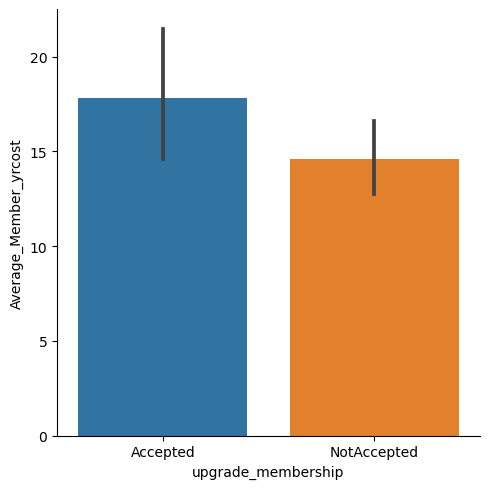

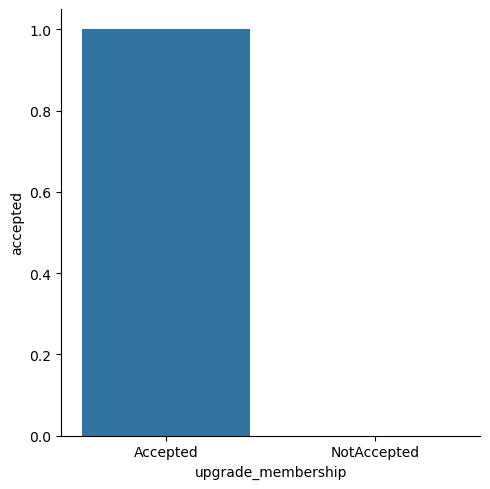

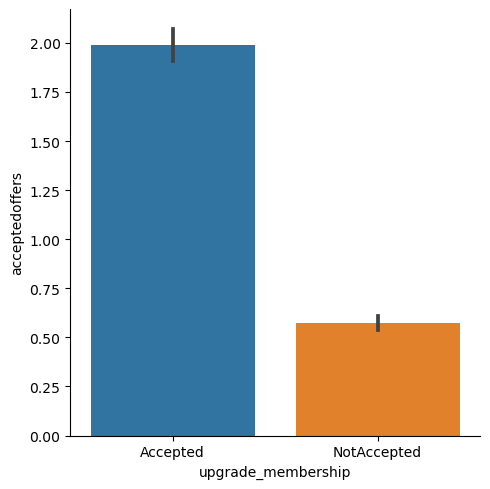

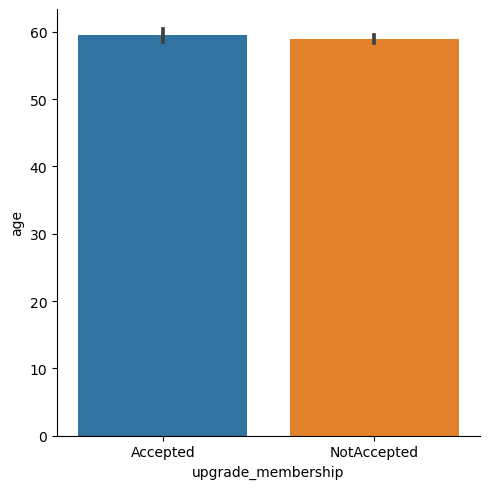

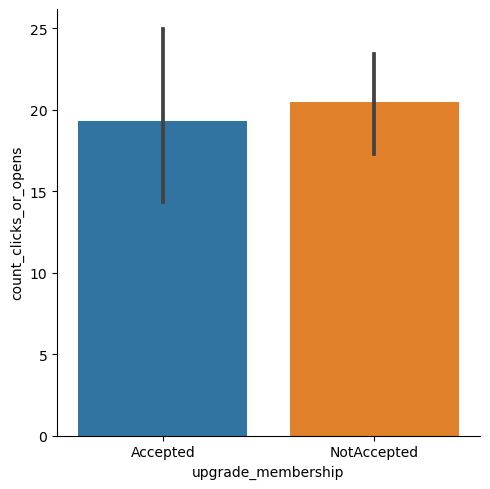

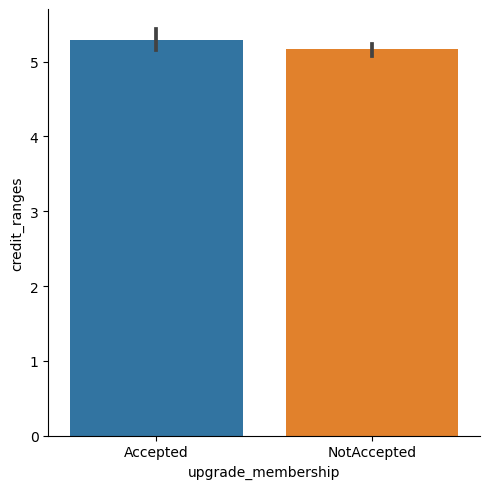

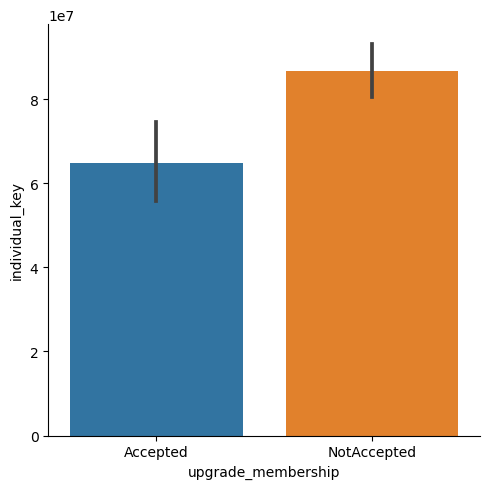

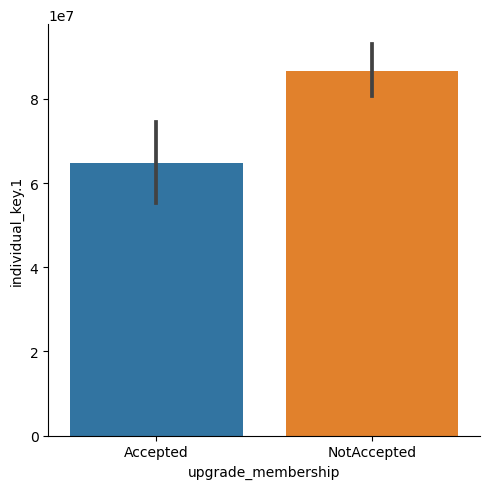

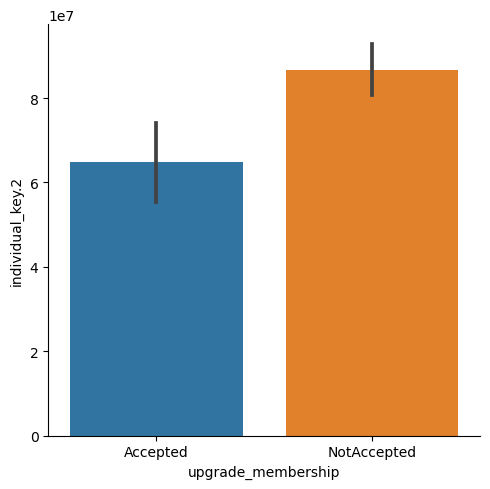

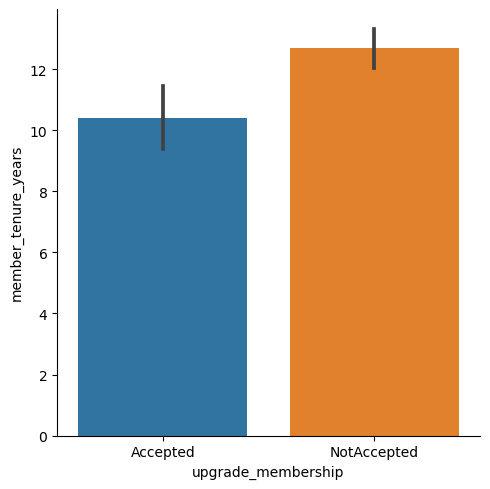

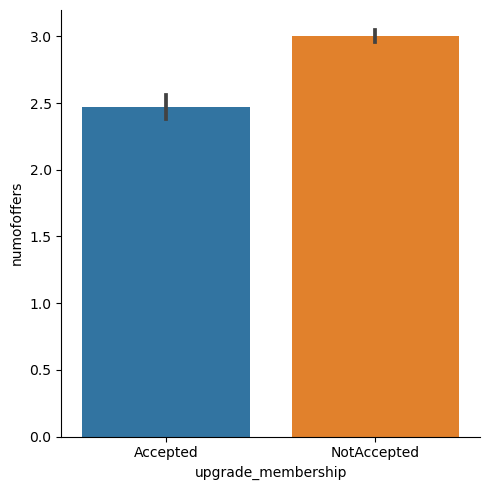

In [16]:
# create a chart looking at the impact of each numerical feature on upgrade membership

for i, col in enumerate(num_columns):
    plt.figure(i)
    sns.catplot(y=col, x='upgrade_membership', data=upgrade_df, kind='bar')

<Figure size 640x480 with 0 Axes>

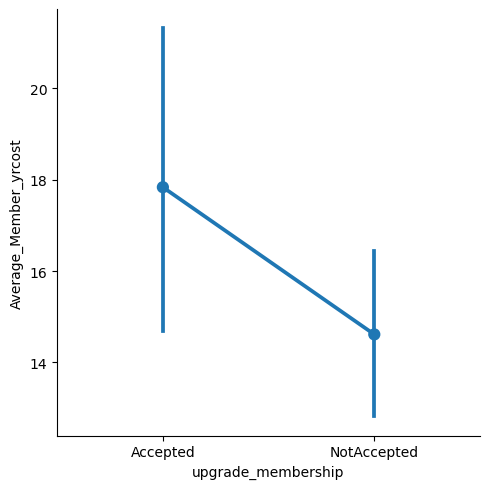

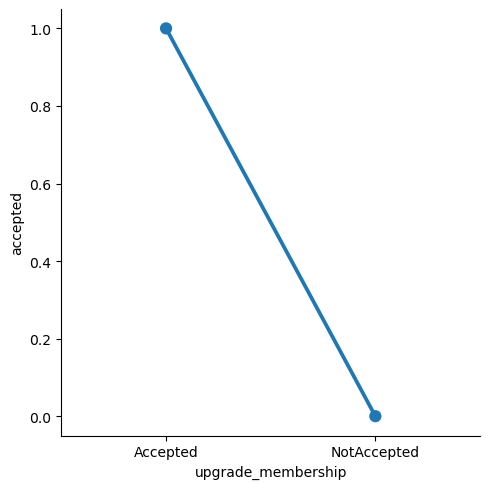

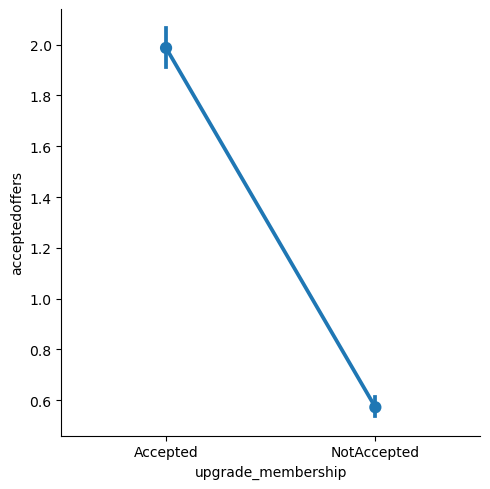

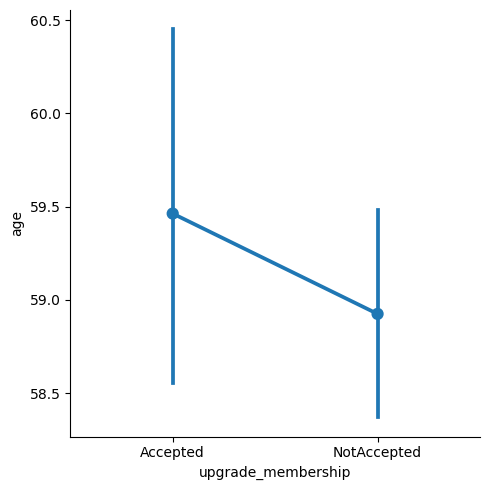

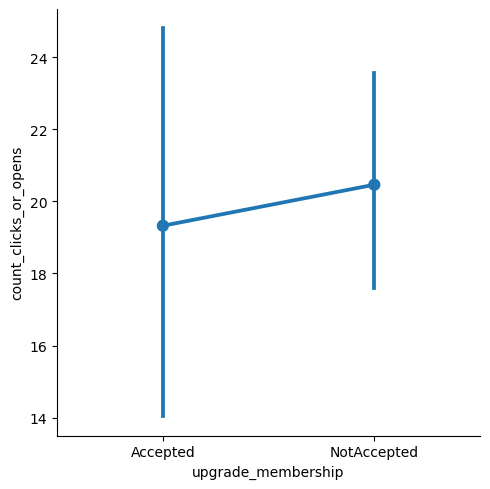

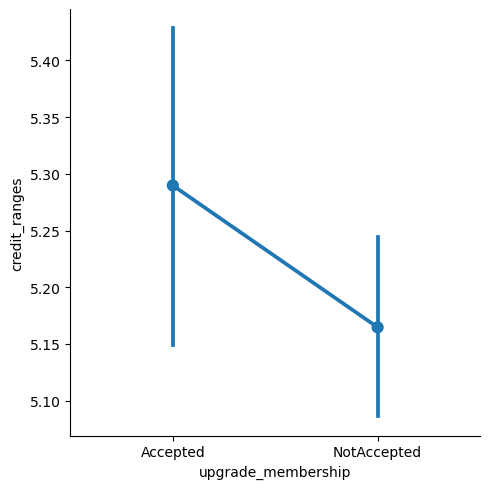

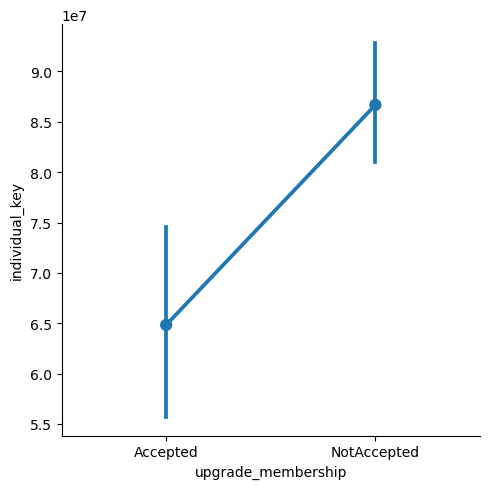

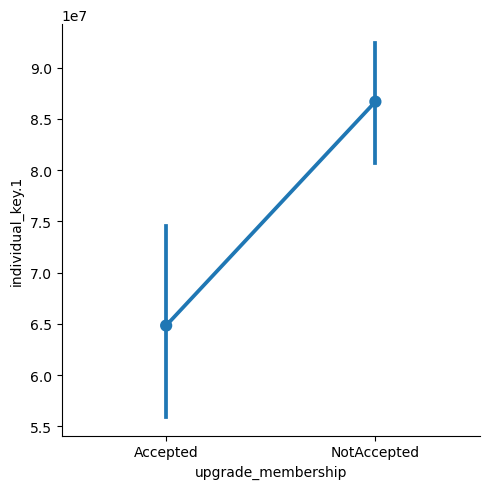

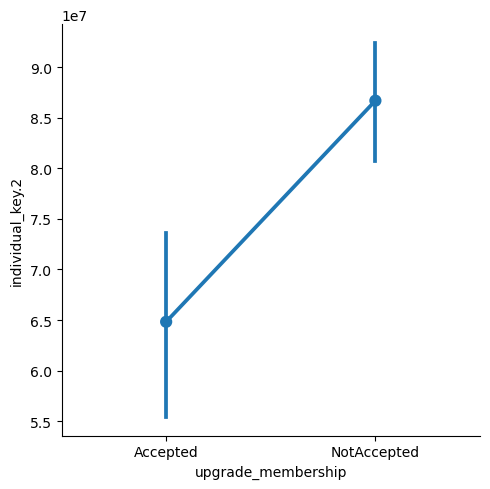

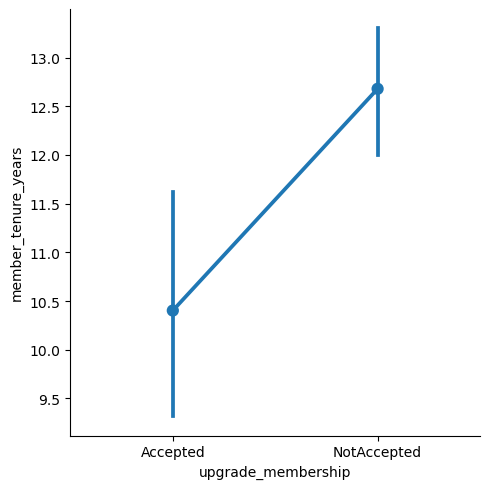

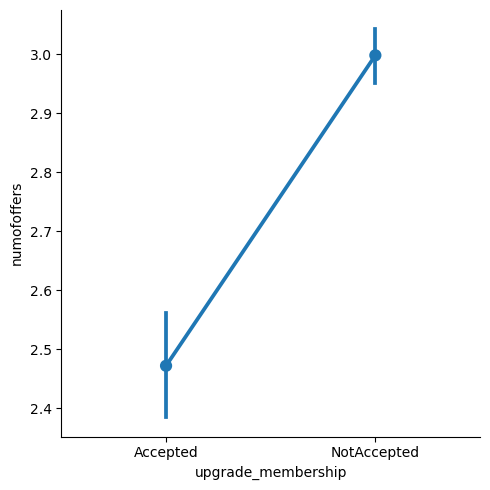

In [17]:
for i, col in enumerate(num_columns):
    plt.figure(i)
    sns.catplot(y=col, x='upgrade_membership', data=upgrade_df, kind='point')

### Step #3: Looking into Categorical Features

In [18]:
filteredColumns = upgrade_df.dtypes[upgrade_df.dtypes==object]
cat_columns=list(filteredColumns.index)

In [19]:
df_cat=upgrade_df[cat_columns]

In [20]:
upgrade_df['target_upgrade_membership']=np.where(upgrade_df['upgrade_membership']=='Accepted', 1, 0)

C:\Users\student\AppData\Local\Temp\ipykernel_20204\2702641539.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  upgrade_df['target_upgrade_membership']=np.where(upgrade_df['upgrade_membership']=='Accepted', 1, 0)


In [21]:
for col in cat_columns:    
    print(upgrade_df.groupby(upgrade_df[col].isnull())['target_upgrade_membership'].mean())

children
False    0.23766
Name: target_upgrade_membership, dtype: float64
dwelling_type
False    0.23766
Name: target_upgrade_membership, dtype: float64
education
False    0.23766
Name: target_upgrade_membership, dtype: float64
estimated_income_code
False    0.247469
True     0.226064
Name: target_upgrade_membership, dtype: float64
marital_status
False    0.23766
Name: target_upgrade_membership, dtype: float64
gender
False    0.23766
Name: target_upgrade_membership, dtype: float64
state
False    0.23766
Name: target_upgrade_membership, dtype: float64
race_cleaned
False    0.23766
Name: target_upgrade_membership, dtype: float64
city_cleaned
False    0.23766
Name: target_upgrade_membership, dtype: float64
offer_name
False    0.23766
Name: target_upgrade_membership, dtype: float64
add_associate
False    0.23766
Name: target_upgrade_membership, dtype: float64
auto-renew
False    0.23766
Name: target_upgrade_membership, dtype: float64
offer_protectmyid
False    0.23766
Name: target_upgrade_

In [24]:
selected_columns=['age', 'children', 'dwelling_type',
       'education', 'estimated_income_code', 'marital_status', 'race_cleaned',
       'gender', 'state', 'city_cleaned', 
       'numofoffers', 'acceptedoffers',
       'consumerview_profitability_score', 'count_clicks_or_opens',
       'credit_ranges', 'donor_flag', 'drv_driving_school_flag',
       'occupation_group', 'member_tenure_years', 'member_type',
       'Average_Member_yrcost', 'target_upgrade_membership']


In [26]:
df_features=upgrade_df[selected_columns]

In [27]:
# filter all categorical features based on cleaned dataset

filteredColumns = df_features.dtypes[df_features.dtypes==object]
cat_columns=list(filteredColumns.index)

In [28]:
df_categorical=pd.get_dummies(df_features[cat_columns])

df_categorical

children_No  children_Unknown  children_Yes  \
8                0                 1             0   
26               0                 1             0   
33               1                 0             0   
35               1                 0             0   
43               0                 1             0   
...            ...               ...           ...   
10434            0                 1             0   
10441            0                 1             0   
10450            0                 1             0   
10467            0                 1             0   
10470            0                 1             0   

       dwelling_type_Multi Family Dwelling/Apartment  dwelling_type_PO Box  \
8                                                  0                     0   
26                                                 0                     0   
33                                                 1                     0   
35                                                 0                     0   
43                                                 0                     0   
...                                              ...                   ...   
10434                                              0                     0   
10441                                              0                     0   
10450                                              0                     0   
10467                                              0                     0   
10470                                              0                     0   

       dwelling_type_Single Family  dwelling_type_Unknown  \
8                                0                      1   
26                               0                      1   
33                               0                      0   
35                               1                      0   
43                               0                      1   
...                            ...                    ...   
10434                            0                      1   
10441                            0                      1   
10450                            0                      1   
10467                            0                      1   
10470                            0                      1   

       education_Completed College  education_Graduate School  \
8                                0                          0   
26                               0                          0   
33                               0                          0   
35                               0                          0   
43                               0                          0   
...                            ...                        ...   
10434                            0                          0   
10441                            0                          0   
10450                            0                          0   
10467                            0                          0   
10470                            0                          0   

       education_High School  ...  occupation_group_Management  \
8                          0  ...                            0   
26                         0  ...                            0   
33                         0  ...                            0   
35                         1  ...                            0   
43                         0  ...                            0   
...                      ...  ...                          ...   
10434                      0  ...                            0   
10441                      0  ...                            0   
10450                      0  ...                            0   
10467                      0  ...                            0   
10470                      0  ...                            0   

       occupation_group_Office Administration  occupation_group_Other  \
8                                        

In [29]:
# filter all numerical features
filteredColumns = df_features.dtypes[df_features.dtypes=='float64']+df_features.dtypes[df_features.dtypes=='int64']+df_features.dtypes[df_features.dtypes=='int32']
num_columns=list(filteredColumns.index)

df_numerical=df_features[num_columns]

df_numerical

Average_Member_yrcost  acceptedoffers   age  count_clicks_or_opens  \
8                       0.00             3.0  58.0                  125.0   
26                      0.00             0.0  58.0                    0.0   
33                     20.91             1.0  76.0                    0.0   
35                      0.00             1.0  63.0                   12.0   
43                      0.00             1.0  58.0                    0.0   
...                      ...             ...   ...                    ...   
10434                   0.00             0.0  58.0                    0.0   
10441                  25.38             3.0  58.0                    0.0   
10450                   0.00             2.0  58.0                    0.0   
10467                   0.00             1.0  58.0                    0.0   
10470                   0.00             0.0  58.0                    0.0   

       credit_ranges  member_tenure_years  numofoffers  \
8                  4                  3.0            3   
26                 4                  9.0            4   
33                 6                 20.0            3   
35                 7                 22.0            3   
43                 4                 37.0            1   
...              ...                  ...          ...   
10434              4                  0.0            3   
10441              4                  0.0            3   
10450              4                  7.0            4   
10467              4                 23.0            3   
10470              4                  9.0            4   

       target_upgrade_membership  
8                              1  
26                             0  
33                             1  
35                             0  
43                             1  
...                          ...  
10434                          0  
10441                          1  
10450                          1  
10467                          0  
10470                          0  

[1641 rows x 8 columns]

In [30]:
df_combined=pd.concat([df_numerical, df_categorical], axis=1)

df_combined

Average_Member_yrcost  acceptedoffers   age  count_clicks_or_opens  \
8                       0.00             3.0  58.0                  125.0   
26                      0.00             0.0  58.0                    0.0   
33                     20.91             1.0  76.0                    0.0   
35                      0.00             1.0  63.0                   12.0   
43                      0.00             1.0  58.0                    0.0   
...                      ...             ...   ...                    ...   
10434                   0.00             0.0  58.0                    0.0   
10441                  25.38             3.0  58.0                    0.0   
10450                   0.00             2.0  58.0                    0.0   
10467                   0.00             1.0  58.0                    0.0   
10470                   0.00             0.0  58.0                    0.0   

       credit_ranges  member_tenure_years  numofoffers  \
8                  4                  3.0            3   
26                 4                  9.0            4   
33                 6                 20.0            3   
35                 7                 22.0            3   
43                 4                 37.0            1   
...              ...                  ...          ...   
10434              4                  0.0            3   
10441              4                  0.0            3   
10450              4                  7.0            4   
10467              4                 23.0            3   
10470              4                  9.0            4   

       target_upgrade_membership  children_No  children_Unknown  ...  \
8                              1            0                 1  ...   
26                             0            0                 1  ...   
33                             1            1                 0  ...   
35                             0            1                 0  ...   
43                             1            0                 1  ...   
...                          ...          ...               ...  ...   
10434                          0            0                 1  ...   
10441                          1            0                 1  ...   
10450                          1            0                 1  ...   
10467                          0            0                 1  ...   
10470                          0            0                 1  ...   

       occupation_group_Management  occupation_group_Office Administration  \
8                                0                                       0   
26                               0                                       0   
33                               0                                       0   
35                               0                                       0   
43                               0                                       0   
...                            ...                                     ...   
10434                            0                                       0   
10441                            0                                       0   
10450                            0                                       0   
10467                            0                                       0   
10470                            0                                       0   

       occupation_group_Other  occupation_group_Professional  \
8                           1                              0   
26                          0                              0   
33                          0                              0   
35                          1                              0   
43                          1                              0   
...                       ...                            ...   
10434                       1                              0   
10441                       1                              0   
10450  

In [42]:
df_numerical.columns

Index(['Average_Member_yrcost', 'acceptedoffers', 'age',
       'count_clicks_or_opens', 'credit_ranges', 'member_tenure_years',
       'numofoffers', 'target_upgrade_membership'],
      dtype='object')

### Step #4: Create Training, Validation and Testing Sets

In [31]:
from sklearn.model_selection import train_test_split

features=df_combined.drop('target_upgrade_membership', axis=1)
label=df_combined['target_upgrade_membership']

x_train, x_test, y_train, y_test=train_test_split(features, label, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test=train_test_split(x_test, y_test, test_size=0.5, random_state=42)

In [32]:
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset)/len(label), 2))

0.7
0.15
0.15


In [33]:
x_train.to_csv('train_features.csv', index=False)
x_val.to_csv('val_features.csv', index=False)
x_test.to_csv('test_features.csv', index=False)

y_train.to_csv('train_labels.csv', index=False)
y_val.to_csv('val_labels.csv', index=False)
y_test.to_csv('test_labels.csv', index=False)

In [34]:
df_train = pd.read_csv('train_features.csv')
df_val = pd.read_csv('val_features.csv')
df_test = pd.read_csv('test_features.csv')
df_train.head()

Average_Member_yrcost  acceptedoffers   age  count_clicks_or_opens  \
0              85.643333             1.0  58.0                   71.0   
1               0.000000             1.0  47.0                   75.0   
2               0.000000             1.0  58.0                   29.0   
3               0.000000             0.0  58.0                    0.0   
4               0.000000             2.0  62.0                    6.0   

   credit_ranges  member_tenure_years  numofoffers  children_No  \
0              4                 15.0            2            0   
1              7                  9.0            2            0   
2              4                  1.0            3            0   
3              4                  9.0            2            0   
4              7                 30.0            2            0   

   children_Unknown  children_Yes  ...  occupation_group_Management  \
0                 1             0  ...                            0   
1                 0             1  ...                            0   
2                 1             0  ...                            0   
3                 1             0  ...                            0   
4                 0             1  ...                            0   

   occupation_group_Office Administration  occupation_group_Other  \
0                                       0                       1   
1                                       0                       0   
2                                       0                       1   
3                                       0                       1   
4                                       0                       1   

   occupation_group_Professional  occupation_group_Retired  \
0                              0                         0   
1                              0                         0   
2                              0                         0   
3                              0                         0   
4                              0                         0   

   occupation_group_Sales  occupation_group_Technical  member_type_Associate  \
0                       0                           0                      0   
1                       1                           0                      0   
2                       0                           0                      0   
3                       0                           0                      0   
4                       0                           0                      0   

   member_type_Primary  member_type_Unknown  
0                    1                    0  
1                    0                    1  
2                    1                    0  
3                    0                    1  
4                    1                    0  

[5 rows x 87 columns]

### Step #5: Standardize

In [35]:
scaler = StandardScaler()
scaler.fit(df_train)

StandardScaler()

In [36]:
features = df_train.columns

df_train[features] = scaler.transform(df_train[features])
df_val[features] = scaler.transform(df_val[features])
df_test[features] = scaler.transform(df_test[features])

df_train.head()

Average_Member_yrcost  acceptedoffers       age  count_clicks_or_opens  \
0               2.070463        0.072434 -0.140228               0.933098   
1              -0.451257        0.072434 -1.272421               1.007066   
2              -0.451257        0.072434 -0.140228               0.156426   
3              -0.451257       -1.021696 -0.140228              -0.379847   
4              -0.451257        1.166563  0.271478              -0.268894   

   credit_ranges  member_tenure_years  numofoffers  children_No  \
0      -0.819378             0.255809    -0.954697    -0.493731   
1       1.237428            -0.267665    -0.954697    -0.493731   
2      -0.819378            -0.965629     0.156857    -0.493731   
3      -0.819378            -0.267665    -0.954697    -0.493731   
4       1.237428             1.564492    -0.954697    -0.493731   

   children_Unknown  children_Yes  ...  occupation_group_Management  \
0          1.173376     -0.788333  ...                    -0.284569   
1         -0.852242      1.268499  ...                    -0.284569   
2          1.173376     -0.788333  ...                    -0.284569   
3          1.173376     -0.788333  ...                    -0.284569   
4         -0.852242      1.268499  ...                    -0.284569   

   occupation_group_Office Administration  occupation_group_Other  \
0                               -0.271847                0.974200   
1                               -0.271847               -1.026483   
2                               -0.271847                0.974200   
3                               -0.271847                0.974200   
4                               -0.271847                0.974200   

   occupation_group_Professional  occupation_group_Retired  \
0                      -0.361987                  -0.34641   
1                      -0.361987                  -0.34641   
2                      -0.361987                  -0.34641   
3                      -0.361987                  -0.34641   
4                      -0.361987                  -0.34641   

   occupation_group_Sales  occupation_group_Technical  member_type_Associate  \
0               -0.187528                   -0.169334              -0.442531   
1                5.332532                   -0.169334              -0.442531   
2               -0.187528                   -0.169334              -0.442531   
3               -0.187528                   -0.169334              -0.442531   
4               -0.187528                   -0.169334              -0.442531   

   member_type_Primary  member_type_Unknown  
0             0.651397            -0.393611  
1            -1.535163             2.540580  
2             0.651397            -0.393611  
3            -1.535163             2.540580  
4             0.651397            -0.393611  

[5 rows x 87 columns]

### Step #6: Split into Four Feature Sets for Model Training

In [95]:
categorical_features = ['children_No', 'children_Unknown', 'children_Yes',
       'dwelling_type_Multi Family Dwelling/Apartment', 'dwelling_type_PO Box',
       'dwelling_type_Single Family', 'dwelling_type_Unknown',
       'education_Completed College', 'education_Graduate School',
       'education_High School', 'education_Some College', 'education_Unknown',
       'estimated_income_code_$10,000-$14,999',
       'estimated_income_code_$100,000-$149,999',
       'estimated_income_code_$15,000-$19,999',
       'estimated_income_code_$150,000-$174,999',
       'estimated_income_code_$175,000-$199,999',
       'estimated_income_code_$20,000-$24,999',
       'estimated_income_code_$200,000-$249,999',
       'estimated_income_code_$25,000-$29,999',
       'estimated_income_code_$250,000+',
       'estimated_income_code_$30,000-$34,999',
       'estimated_income_code_$35,000-$39,999',
       'estimated_income_code_$40,000-$44,999',
       'estimated_income_code_$45,000-$49,999',
       'estimated_income_code_$50,000-$54,999',
       'estimated_income_code_$55,000-$59,999',
       'estimated_income_code_$60,000-$64,999',
       'estimated_income_code_$65,000-$74,999',
       'estimated_income_code_$75,000-$99,999',
       'estimated_income_code_Under $10,000', 'marital_status_Married',
       'marital_status_Single', 'marital_status_Unknown',
       'race_cleaned_African American ', 'race_cleaned_American Indian',
       'race_cleaned_Asian ', 'race_cleaned_Caucasian / White ',
       'race_cleaned_Hispanic ', 'race_cleaned_Middle Eastern ',
       'race_cleaned_Unknown', 'gender_F', 'gender_M', 'gender_U', 'gender_X',
       'state_CT', 'state_MA', 'state_NJ', 'state_NY', 'state_Others',
       'state_RI', 'city_cleaned_BRAINTREE', 'city_cleaned_BROOKLYN',
       'city_cleaned_DORCHESTER', 'city_cleaned_DORCHESTER CENTER',
       'city_cleaned_LOWELL', 'city_cleaned_MILTON', 'city_cleaned_NEW YORK',
       'city_cleaned_OTHER', 'city_cleaned_Others', 'city_cleaned_QUINCY',
       'city_cleaned_SPRINGFIELD',
       'consumerview_profitability_score_Fair Profitability, Medium Likelihood to Perform',
       'consumerview_profitability_score_Good Profitability, Medium Likelihood to Perform',
       'consumerview_profitability_score_High Profitability, High Likelihood to Perform',
       'consumerview_profitability_score_Poor Profitability, Unlikely to Perform',
       'consumerview_profitability_score_Unknown', 'drv_driving_school_flag_N',
       'drv_driving_school_flag_Y', 'occupation_group_Blue Collar',
       'occupation_group_Management', 'occupation_group_Office Administration',
       'occupation_group_Other', 'occupation_group_Professional',
       'occupation_group_Retired', 'occupation_group_Sales',
       'occupation_group_Technical', 'member_type_Associate',
       'member_type_Primary', 'member_type_Unknown']

numeric_features = ['Average_Member_yrcost', #'acceptedoffers', 
                    'age','count_clicks_or_opens', 'credit_ranges', 'member_tenure_years',
                    'numofoffers']

all_features = ['Average_Member_yrcost', 'age', #'acceptedoffers', 
       'count_clicks_or_opens', 'credit_ranges', 'member_tenure_years',
       'numofoffers', 'children_No', 'children_Unknown', 'children_Yes',
       'dwelling_type_Multi Family Dwelling/Apartment', 'dwelling_type_PO Box',
       'dwelling_type_Single Family', 'dwelling_type_Unknown',
       'education_Completed College', 'education_Graduate School',
       'education_High School', 'education_Some College', 'education_Unknown',
       'estimated_income_code_$10,000-$14,999',
       'estimated_income_code_$100,000-$149,999',
       'estimated_income_code_$15,000-$19,999',
       'estimated_income_code_$150,000-$174,999',
       'estimated_income_code_$175,000-$199,999',
       'estimated_income_code_$20,000-$24,999',
       'estimated_income_code_$200,000-$249,999',
       'estimated_income_code_$25,000-$29,999',
       'estimated_income_code_$250,000+',
       'estimated_income_code_$30,000-$34,999',
       'estimated_income_code_$35,000-$39,999',
       'estimated_income_code_$40,000-$44,999',
       'estimated_income_code_$45,000-$49,999',
       'estimated_income_code_$50,000-$54,999',
       'estimated_income_code_$55,000-$59,999',
       'estimated_income_code_$60,000-$64,999',
       'estimated_income_code_$65,000-$74,999',
       'estimated_income_code_$75,000-$99,999',
       'estimated_income_code_Under $10,000', 'marital_status_Married',
       'marital_status_Single', 'marital_status_Unknown',
       'race_cleaned_African American ', 'race_cleaned_American Indian',
       'race_cleaned_Asian ', 'race_cleaned_Caucasian / White ',
       'race_cleaned_Hispanic ', 'race_cleaned_Middle Eastern ',
       'race_cleaned_Unknown', 'gender_F', 'gender_M', 'gender_U', 'gender_X',
       'state_CT', 'state_MA', 'state_NJ', 'state_NY', 'state_Others',
       'state_RI', 'city_cleaned_BRAINTREE', 'city_cleaned_BROOKLYN',
       'city_cleaned_DORCHESTER', 'city_cleaned_DORCHESTER CENTER',
       'city_cleaned_LOWELL', 'city_cleaned_MILTON', 'city_cleaned_NEW YORK',
       'city_cleaned_OTHER', 'city_cleaned_Others', 'city_cleaned_QUINCY',
       'city_cleaned_SPRINGFIELD',
       'consumerview_profitability_score_Fair Profitability, Medium Likelihood to Perform',
       'consumerview_profitability_score_Good Profitability, Medium Likelihood to Perform',
       'consumerview_profitability_score_High Profitability, High Likelihood to Perform',
       'consumerview_profitability_score_Poor Profitability, Unlikely to Perform',
       'consumerview_profitability_score_Unknown', 'drv_driving_school_flag_N',
       'drv_driving_school_flag_Y', 'occupation_group_Blue Collar',
       'occupation_group_Management', 'occupation_group_Office Administration',
       'occupation_group_Other', 'occupation_group_Professional',
       'occupation_group_Retired', 'occupation_group_Sales',
       'occupation_group_Technical', 'member_type_Associate',
       'member_type_Primary', 'member_type_Unknown']


reduced_features = ['Average_Member_yrcost', 'age',
       'count_clicks_or_opens', 'credit_ranges', 'member_tenure_years',
       'numofoffers', 'children_No',
       'children_Unknown', 'children_Yes',
       'dwelling_type_Multi Family Dwelling/Apartment', 'dwelling_type_PO Box',
       'dwelling_type_Single Family', 'dwelling_type_Unknown',
       'education_Completed College', 'education_Graduate School',
       'education_High School', 'education_Some College', 'education_Unknown',
        'marital_status_Married',
       'marital_status_Single', 'marital_status_Unknown','gender_F', 'gender_M',
       'gender_U', 'gender_X', 'state_CT', 'state_MA', 'state_NJ', 'state_NY',
       'state_Others', 'state_RI',
       'consumerview_profitability_score_Fair Profitability, Medium Likelihood to Perform',
       'consumerview_profitability_score_Good Profitability, Medium Likelihood to Perform',
       'consumerview_profitability_score_High Profitability, High Likelihood to Perform',
       'consumerview_profitability_score_Poor Profitability, Unlikely to Perform',
       'occupation_group_Blue Collar', 'occupation_group_Management',
       'occupation_group_Office Administration', 'occupation_group_Other',
       'occupation_group_Professional', 'occupation_group_Retired',
       'occupation_group_Sales', 'occupation_group_Technical',
       'member_type_Associate', 'member_type_Primary']

In [96]:
df_train[categorical_features].to_csv('train_features_cat.csv', index=False)
df_val[categorical_features].to_csv('val_features_cat.csv', index=False)
df_test[categorical_features].to_csv('test_features_cat.csv', index=False)

df_train[numeric_features].to_csv('train_features_num.csv', index=False)
df_val[numeric_features].to_csv('val_features_num.csv', index=False)
df_test[numeric_features].to_csv('test_features_num.csv', index=False)

df_train[all_features].to_csv('train_features_all.csv', index=False)
df_val[all_features].to_csv('val_features_all.csv', index=False)
df_test[all_features].to_csv('test_features_all.csv', index=False)

df_train[reduced_features].to_csv('train_features_reduced.csv', index=False)
df_val[reduced_features].to_csv('val_features_reduced.csv', index=False)
df_test[reduced_features].to_csv('test_features_reduced.csv', index=False)

### Step #7: Build rf model for reduced features

In [48]:
train_features_red = pd.read_csv('train_features_reduced.csv')
train_labels = pd.read_csv('train_labels.csv')

train_features_red.head()

Average_Member_yrcost       age  count_clicks_or_opens  credit_ranges  \
0               2.070463 -0.140228               0.933098      -0.819378   
1              -0.451257 -1.272421               1.007066       1.237428   
2              -0.451257 -0.140228               0.156426      -0.819378   
3              -0.451257 -0.140228              -0.379847      -0.819378   
4              -0.451257  0.271478              -0.268894       1.237428   

   member_tenure_years  numofoffers  children_No  children_Unknown  \
0             0.255809    -0.954697    -0.493731          1.173376   
1            -0.267665    -0.954697    -0.493731         -0.852242   
2            -0.965629     0.156857    -0.493731          1.173376   
3            -0.267665    -0.954697    -0.493731          1.173376   
4             1.564492    -0.954697    -0.493731         -0.852242   

   children_Yes  dwelling_type_Multi Family Dwelling/Apartment  ...  \
0     -0.788333                                      -0.335266  ...   
1      1.268499                                      -0.335266  ...   
2     -0.788333                                      -0.335266  ...   
3     -0.788333                                      -0.335266  ...   
4      1.268499                                       2.982709  ...   

   occupation_group_Blue Collar  occupation_group_Management  \
0                     -0.248957                    -0.284569   
1                     -0.248957                    -0.284569   
2                     -0.248957                    -0.284569   
3                     -0.248957                    -0.284569   
4                     -0.248957                    -0.284569   

   occupation_group_Office Administration  occupation_group_Other  \
0                               -0.271847                0.974200   
1                               -0.271847               -1.026483   
2                               -0.271847                0.974200   
3                               -0.271847                0.974200   
4                               -0.271847                0.974200   

   occupation_group_Professional  occupation_group_Retired  \
0                      -0.361987                  -0.34641   
1                      -0.361987                  -0.34641   
2                      -0.361987                  -0.34641   
3                      -0.361987                  -0.34641   
4                      -0.361987                  -0.34641   

   occupation_group_Sales  occupation_group_Technical  member_type_Associate  \
0               -0.187528                   -0.169334              -0.442531   
1                5.332532                   -0.169334              -0.442531   
2               -0.187528                   -0.169334              -0.442531   
3               -0.187528                   -0.169334              -0.442531   
4               -0.187528                   -0.169334              -0.442531   

   member_type_Primary  
0             0.651397  
1            -1.535163  
2             0.651397  
3            -1.535163  
4             0.651397  

[5 rows x 45 columns]

In [49]:
train_features_red.isnull().sum()

Average_Member_yrcost                                                                0
age                                                                                  0
count_clicks_or_opens                                                                0
credit_ranges                                                                        0
member_tenure_years                                                                  0
numofoffers                                                                          0
children_No                                                                          0
children_Unknown                                                                     0
children_Yes                                                                         0
dwelling_type_Multi Family Dwelling/Apartment                                        0
dwelling_type_PO Box                                                                 0
dwelling_type_Single Family                

In [50]:
train_features_red['age'].fillna(train_features_red['age'].mean(), inplace=True)

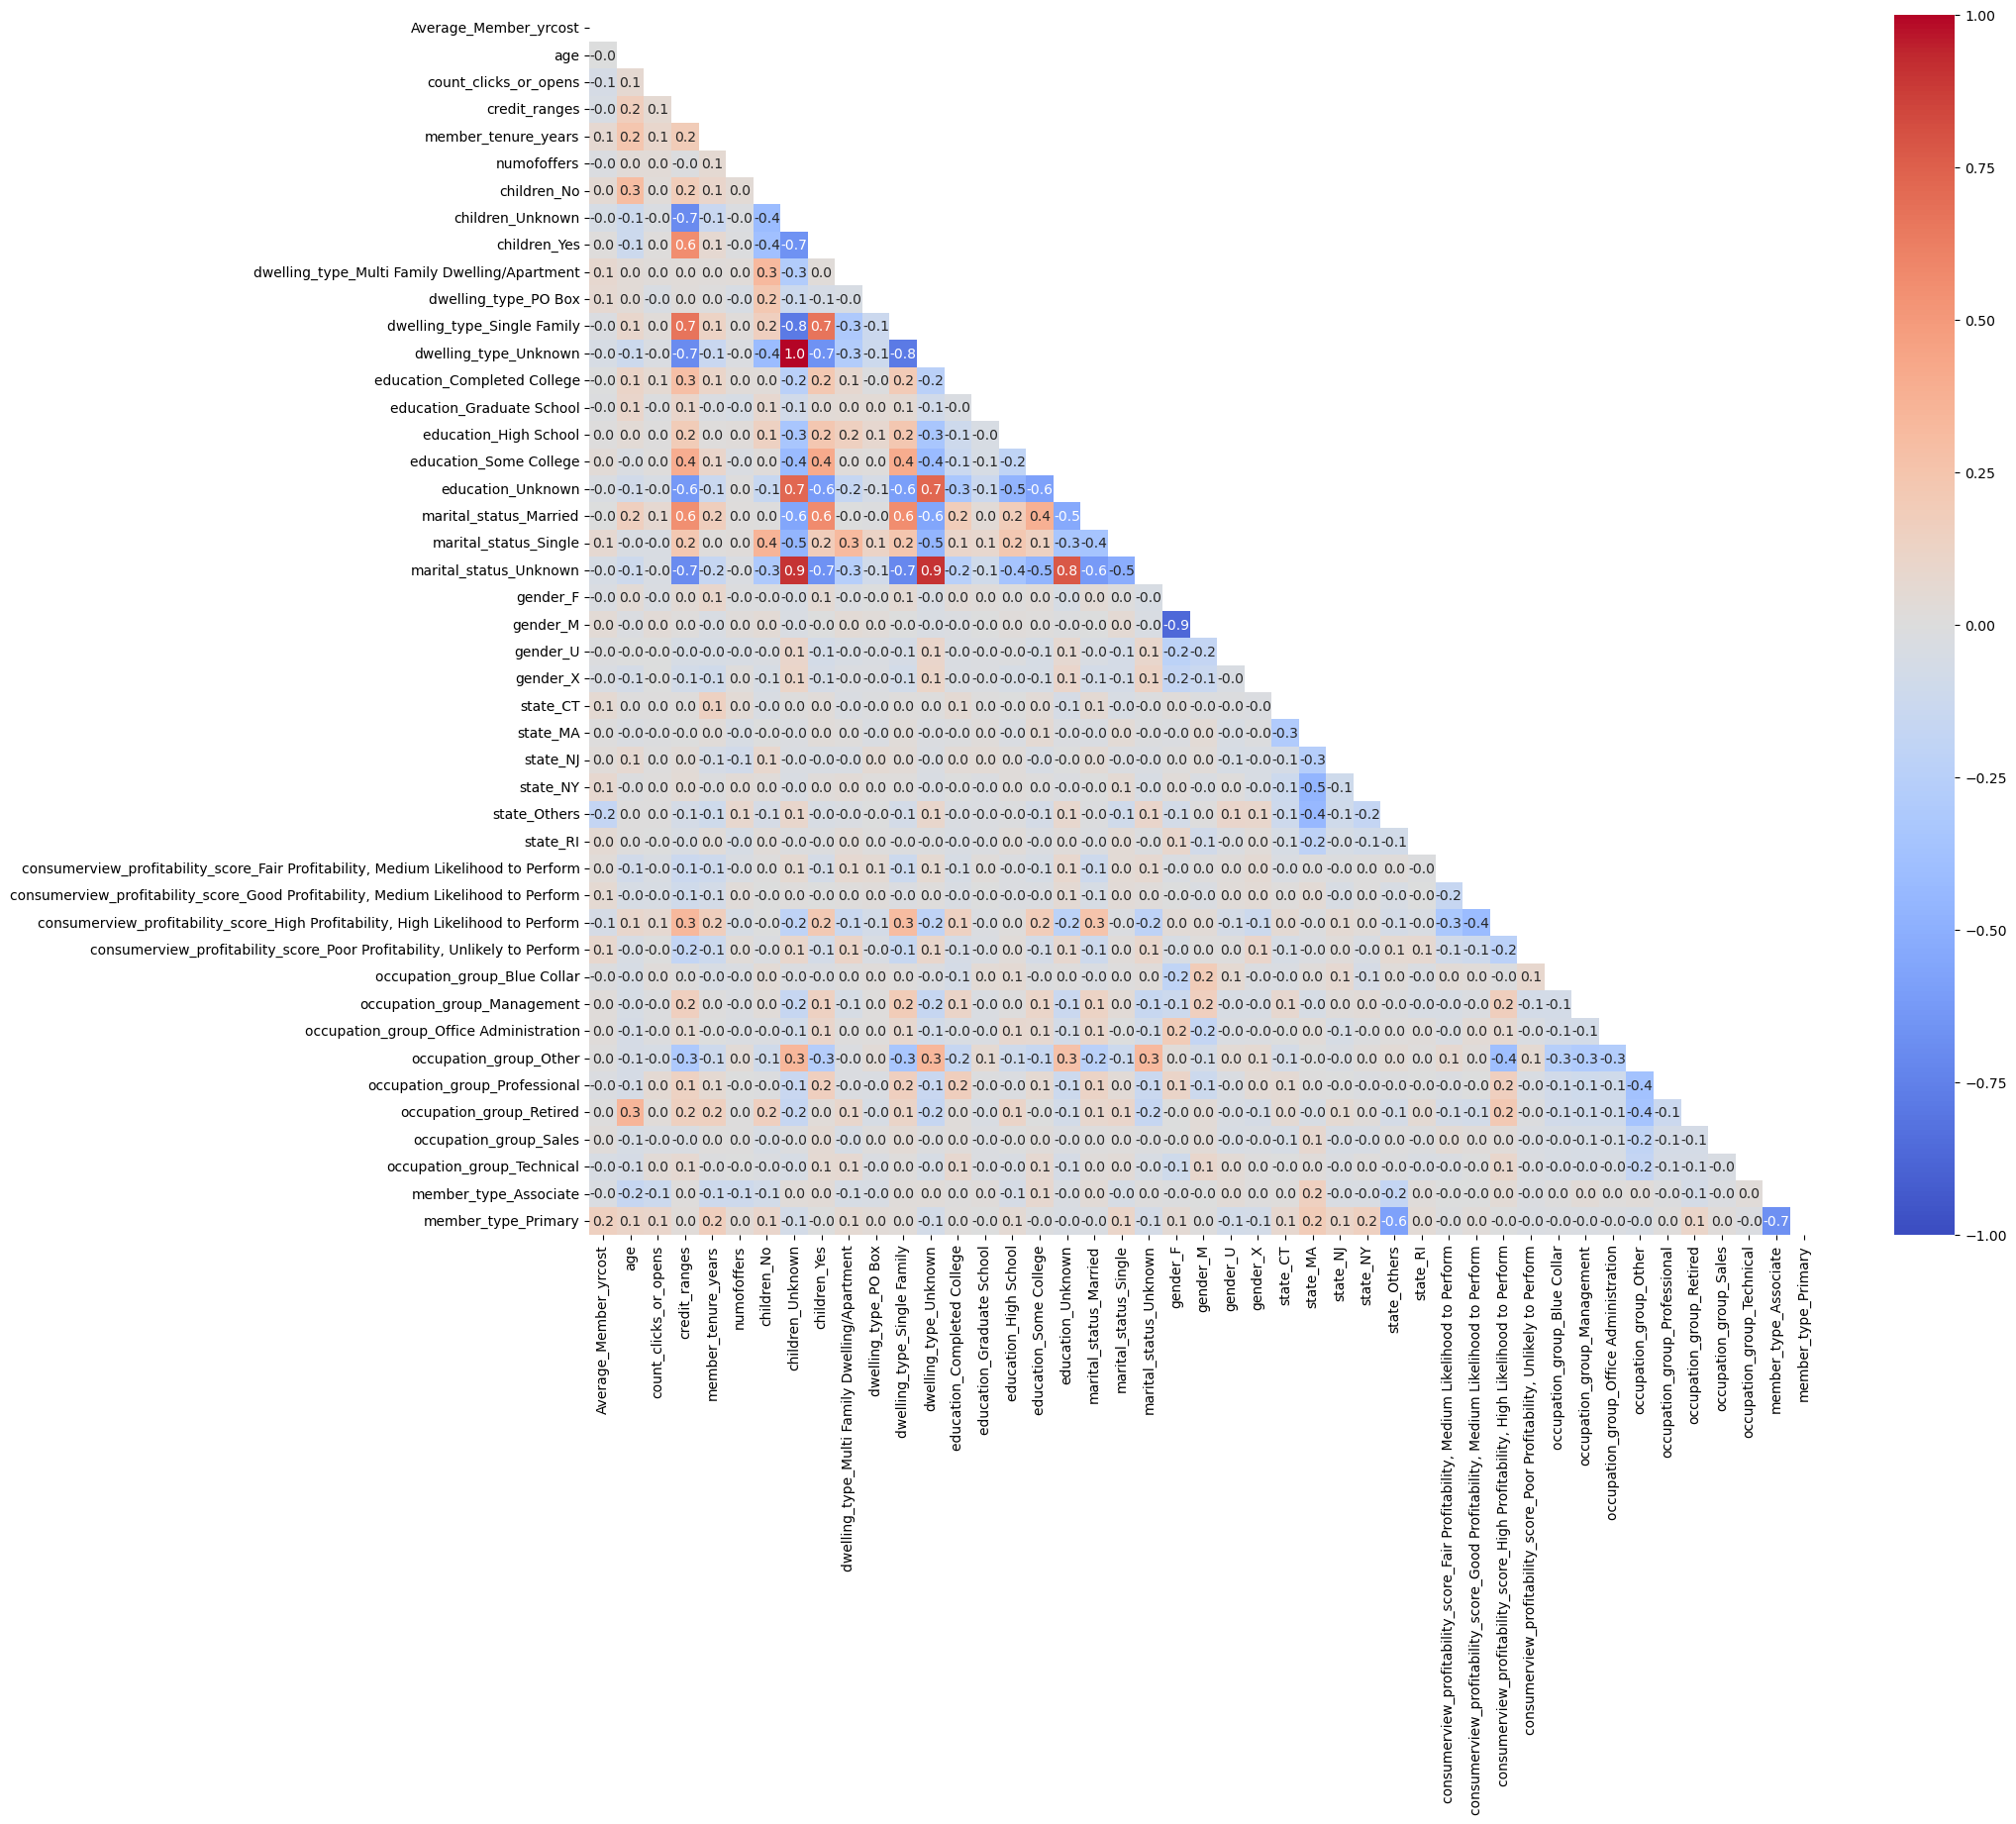

In [51]:
# Generate correlation matrix heat map
matrix = np.triu(train_features_red.corr())
plt.figure(figsize=(20, 16))
sns.heatmap(train_features_red.corr(), annot=True, fmt='.1f', vmin=-1, vmax=1, center= 0, cmap='coolwarm', mask=matrix)
plt.show()

In [52]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [53]:
# Conduct search for best params while running cross-validation (GridSearchCV)
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [2**i for i in range(3, 10)],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(train_features_red, train_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 8, 'n_estimators': 64}

0.75 (+/-0.004) for {'max_depth': 2, 'n_estimators': 8}
0.75 (+/-0.004) for {'max_depth': 2, 'n_estimators': 16}
0.75 (+/-0.004) for {'max_depth': 2, 'n_estimators': 32}
0.75 (+/-0.004) for {'max_depth': 2, 'n_estimators': 64}
0.75 (+/-0.004) for {'max_depth': 2, 'n_estimators': 128}
0.75 (+/-0.004) for {'max_depth': 2, 'n_estimators': 256}
0.75 (+/-0.004) for {'max_depth': 2, 'n_estimators': 512}
0.749 (+/-0.006) for {'max_depth': 4, 'n_estimators': 8}
0.748 (+/-0.008) for {'max_depth': 4, 'n_estimators': 16}
0.749 (+/-0.006) for {'max_depth': 4, 'n_estimators': 32}
0.75 (+/-0.004) for {'max_depth': 4, 'n_estimators': 64}
0.75 (+/-0.004) for {'max_depth': 4, 'n_estimators': 128}
0.75 (+/-0.004) for {'max_depth': 4, 'n_estimators': 256}
0.75 (+/-0.004) for {'max_depth': 4, 'n_estimators': 512}
0.739 (+/-0.016) for {'max_depth': 8, 'n_estimators': 8}
0.751 (+/-0.024) for {'max_depth': 8, 'n_estimators': 16}
0.747 (+/-0.017) for {'max_de

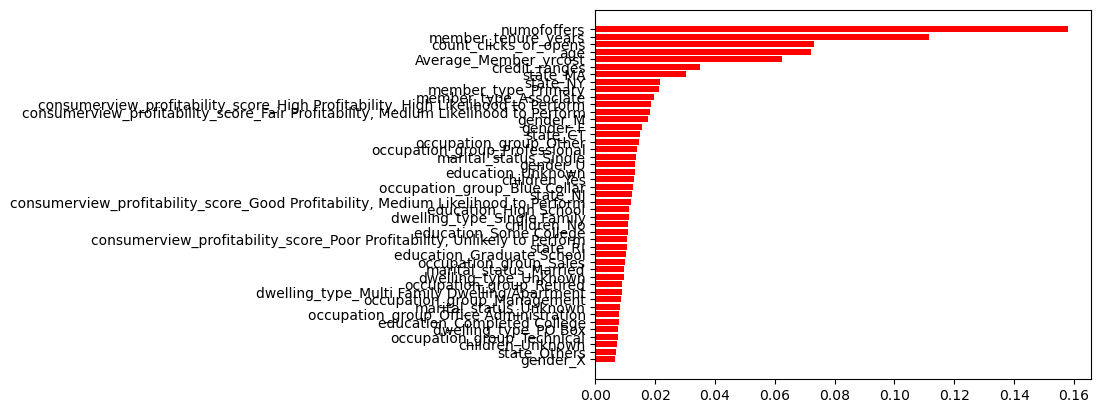

<Figure size 6000x4500 with 0 Axes>

In [54]:
# Generate feature importance plot
feat_imp = cv.best_estimator_.feature_importances_
indices = np.argsort(feat_imp)
plt.yticks(range(len(indices)), [train_features_red.columns[i] for i in indices])
plt.barh(range(len(indices)), feat_imp[indices], color='r', align='center')
plt.figure(figsize=(60, 45))
plt.show()

In [55]:
joblib.dump(cv.best_estimator_, 'rf_features_red.pkl')

['rf_features_red.pkl']

### Step #8: Build rf model for categorical features

In [56]:
train_features_cat = pd.read_csv('train_features_cat.csv')
train_labels = pd.read_csv('train_labels.csv')

train_features_cat.head()

children_No  children_Unknown  children_Yes  \
0    -0.493731          1.173376     -0.788333   
1    -0.493731         -0.852242      1.268499   
2    -0.493731          1.173376     -0.788333   
3    -0.493731          1.173376     -0.788333   
4    -0.493731         -0.852242      1.268499   

   dwelling_type_Multi Family Dwelling/Apartment  dwelling_type_PO Box  \
0                                      -0.335266             -0.139779   
1                                      -0.335266             -0.139779   
2                                      -0.335266             -0.139779   
3                                      -0.335266             -0.139779   
4                                       2.982709             -0.139779   

   dwelling_type_Single Family  dwelling_type_Unknown  \
0                    -0.921212               1.173376   
1                     1.085527              -0.852242   
2                    -0.921212               1.173376   
3                    -0.921212               1.173376   
4                    -0.921212              -0.852242   

   education_Completed College  education_Graduate School  \
0                    -0.280976                  -0.107022   
1                    -0.280976                  -0.107022   
2                    -0.280976                  -0.107022   
3                    -0.280976                  -0.107022   
4                     3.559026                  -0.107022   

   education_High School  ...  occupation_group_Management  \
0              -0.400959  ...                    -0.284569   
1              -0.400959  ...                    -0.284569   
2              -0.400959  ...                    -0.284569   
3              -0.400959  ...                    -0.284569   
4              -0.400959  ...                    -0.284569   

   occupation_group_Office Administration  occupation_group_Other  \
0                               -0.271847                0.974200   
1                               -0.271847               -1.026483   
2                               -0.271847                0.974200   
3                               -0.271847                0.974200   
4                               -0.271847                0.974200   

   occupation_group_Professional  occupation_group_Retired  \
0                      -0.361987                  -0.34641   
1                      -0.361987                  -0.34641   
2                      -0.361987                  -0.34641   
3                      -0.361987                  -0.34641   
4                      -0.361987                  -0.34641   

   occupation_group_Sales  occupation_group_Technical  member_type_Associate  \
0               -0.187528                   -0.169334              -0.442531   
1                5.332532                   -0.169334              -0.442531   
2               -0.187528                   -0.169334              -0.442531   
3               -0.187528                   -0.169334              -0.442531   
4               -0.187528                   -0.169334              -0.442531   

   member_type_Primary  member_type_Unknown  
0             0.651397            -0.393611  
1            -1.535163             2.540580  
2             0.651397            -0.393611  
3            -1.535163             2.540580  
4             0.651397            -0.393611  

[5 rows x 80 columns]

In [57]:
train_features_cat.isnull().sum()

children_No                                      0
children_Unknown                                 0
children_Yes                                     0
dwelling_type_Multi Family Dwelling/Apartment    0
dwelling_type_PO Box                             0
                                                ..
occupation_group_Sales                           0
occupation_group_Technical                       0
member_type_Associate                            0
member_type_Primary                              0
member_type_Unknown                              0
Length: 80, dtype: int64

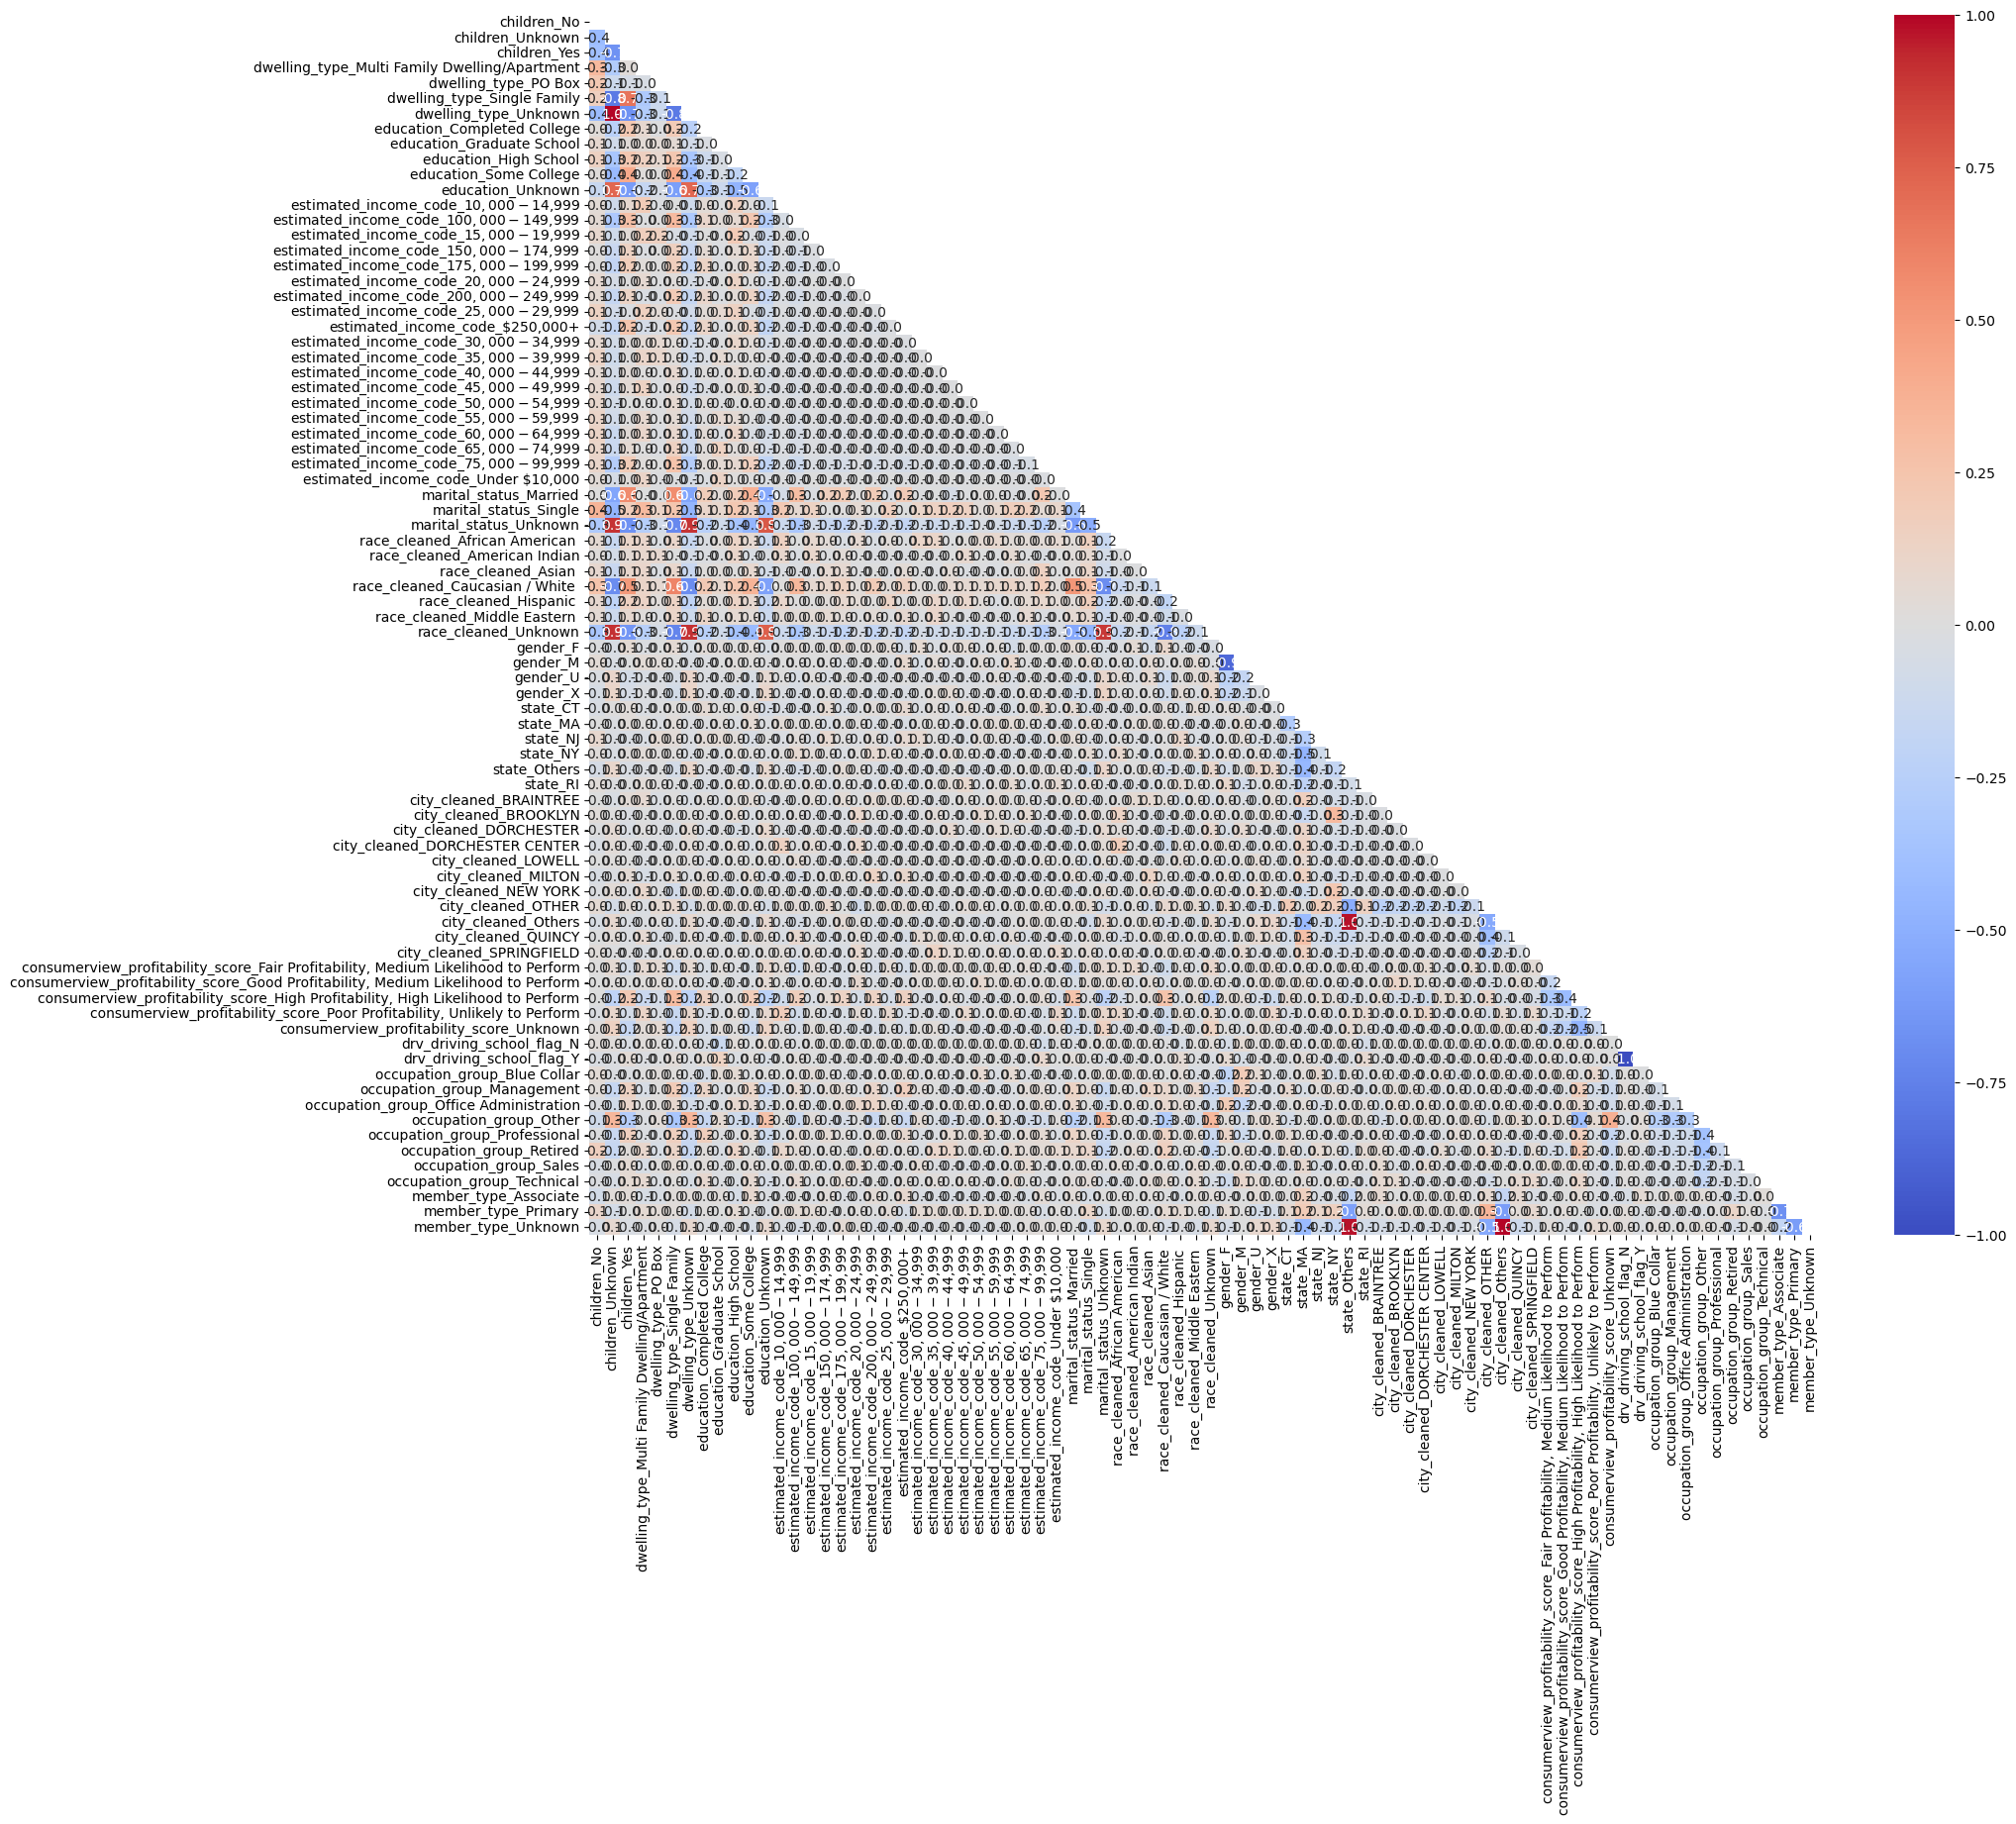

In [58]:
matrix = np.triu(train_features_cat.corr())
plt.figure(figsize=(20, 16))
sns.heatmap(train_features_cat.corr(), annot=True, fmt='.1f', vmin=-1, vmax=1, center= 0, cmap='coolwarm', mask=matrix)
plt.show()

In [59]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [60]:
# Conduct search for best params while running cross-validation (GridSearchCV)
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [2**i for i in range(3, 10)],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(train_features_cat, train_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 8, 'n_estimators': 16}

0.75 (+/-0.004) for {'max_depth': 2, 'n_estimators': 8}
0.75 (+/-0.004) for {'max_depth': 2, 'n_estimators': 16}
0.75 (+/-0.004) for {'max_depth': 2, 'n_estimators': 32}
0.75 (+/-0.004) for {'max_depth': 2, 'n_estimators': 64}
0.75 (+/-0.004) for {'max_depth': 2, 'n_estimators': 128}
0.75 (+/-0.004) for {'max_depth': 2, 'n_estimators': 256}
0.75 (+/-0.004) for {'max_depth': 2, 'n_estimators': 512}
0.75 (+/-0.009) for {'max_depth': 4, 'n_estimators': 8}
0.75 (+/-0.004) for {'max_depth': 4, 'n_estimators': 16}
0.75 (+/-0.004) for {'max_depth': 4, 'n_estimators': 32}
0.75 (+/-0.004) for {'max_depth': 4, 'n_estimators': 64}
0.75 (+/-0.004) for {'max_depth': 4, 'n_estimators': 128}
0.75 (+/-0.004) for {'max_depth': 4, 'n_estimators': 256}
0.75 (+/-0.004) for {'max_depth': 4, 'n_estimators': 512}
0.747 (+/-0.019) for {'max_depth': 8, 'n_estimators': 8}
0.751 (+/-0.003) for {'max_depth': 8, 'n_estimators': 16}
0.75 (+/-0.004) for {'max_depth'

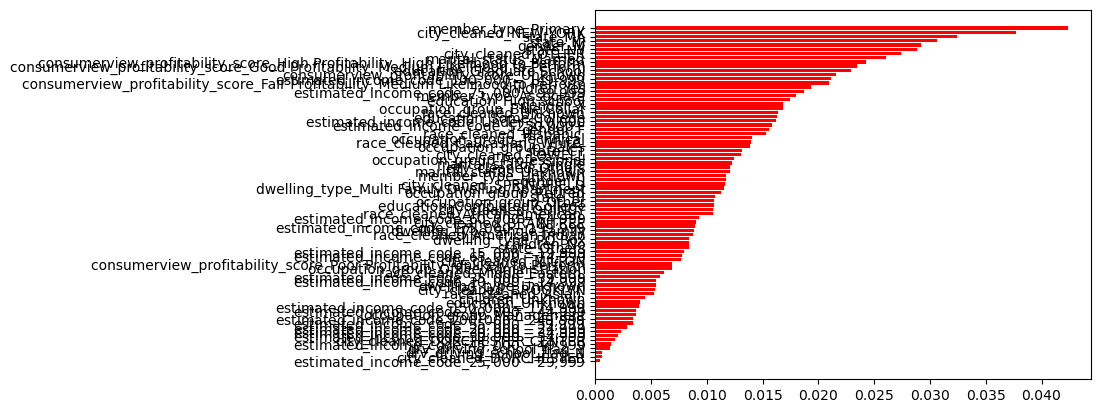

<Figure size 6000x4500 with 0 Axes>

In [61]:
# Generate feature importance plot
feat_imp = cv.best_estimator_.feature_importances_
indices = np.argsort(feat_imp)
plt.yticks(range(len(indices)), [train_features_cat.columns[i] for i in indices])
plt.barh(range(len(indices)), feat_imp[indices], color='r', align='center')
plt.figure(figsize=(60, 45))
plt.show()

In [62]:
joblib.dump(cv.best_estimator_, 'rf_features_cat.pkl')

['rf_features_cat.pkl']

### Step #9: Build rf model for numerical features

In [97]:
train_features_num = pd.read_csv('train_features_num.csv')
train_labels = pd.read_csv('train_labels.csv')

train_features_num.head()

Average_Member_yrcost       age  count_clicks_or_opens  credit_ranges  \
0               2.070463 -0.140228               0.933098      -0.819378   
1              -0.451257 -1.272421               1.007066       1.237428   
2              -0.451257 -0.140228               0.156426      -0.819378   
3              -0.451257 -0.140228              -0.379847      -0.819378   
4              -0.451257  0.271478              -0.268894       1.237428   

   member_tenure_years  numofoffers  
0             0.255809    -0.954697  
1            -0.267665    -0.954697  
2            -0.965629     0.156857  
3            -0.267665    -0.954697  
4             1.564492    -0.954697

In [98]:
train_features_num['age'].fillna(train_features_num['age'].mean(), inplace=True)

In [99]:
train_features_num.isnull().sum()

Average_Member_yrcost    0
age                      0
count_clicks_or_opens    0
credit_ranges            0
member_tenure_years      0
numofoffers              0
dtype: int64

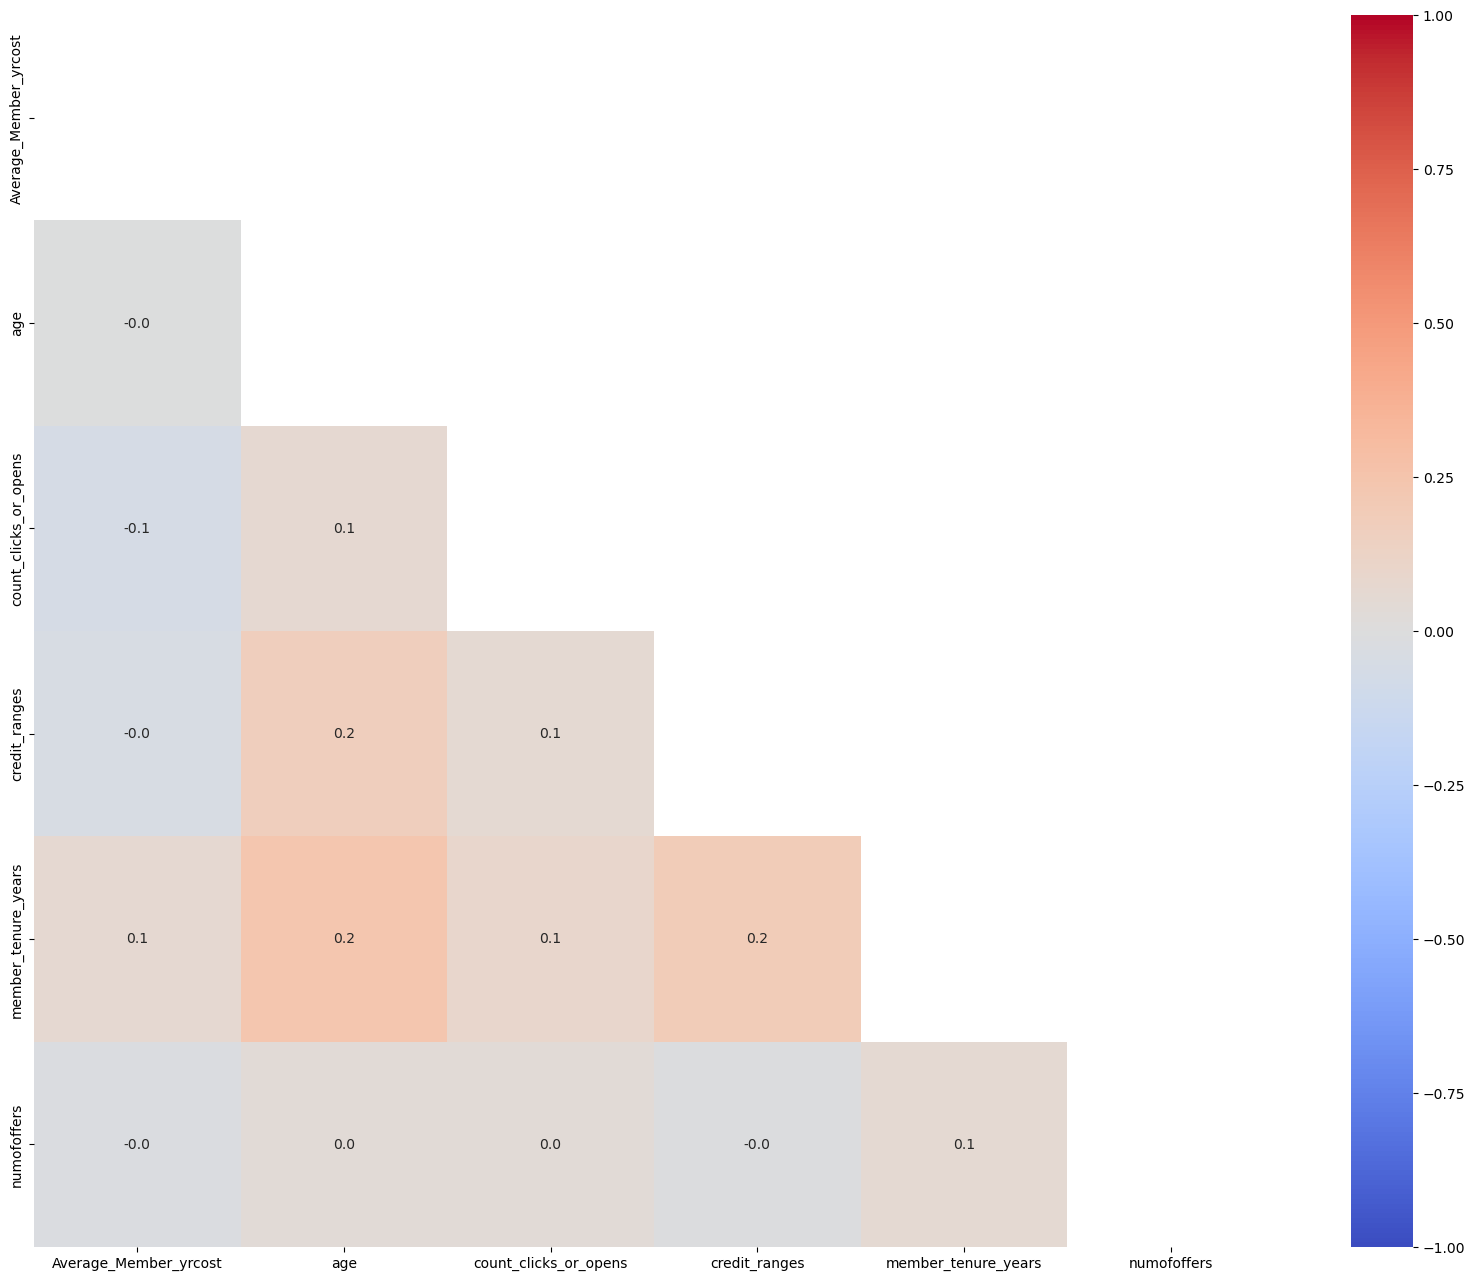

In [100]:
matrix = np.triu(train_features_num.corr())
plt.figure(figsize=(20, 16))
sns.heatmap(train_features_num.corr(), annot=True, fmt='.1f', vmin=-1, vmax=1, center= 0, cmap='coolwarm', mask=matrix)
plt.show()

In [101]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [102]:
# Conduct search for best params while running cross-validation (GridSearchCV)
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [2**i for i in range(3, 10)],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(train_features_num, train_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 8, 'n_estimators': 64}

0.749 (+/-0.006) for {'max_depth': 2, 'n_estimators': 8}
0.75 (+/-0.004) for {'max_depth': 2, 'n_estimators': 16}
0.75 (+/-0.004) for {'max_depth': 2, 'n_estimators': 32}
0.75 (+/-0.004) for {'max_depth': 2, 'n_estimators': 64}
0.75 (+/-0.004) for {'max_depth': 2, 'n_estimators': 128}
0.75 (+/-0.004) for {'max_depth': 2, 'n_estimators': 256}
0.75 (+/-0.004) for {'max_depth': 2, 'n_estimators': 512}
0.752 (+/-0.012) for {'max_depth': 4, 'n_estimators': 8}
0.75 (+/-0.018) for {'max_depth': 4, 'n_estimators': 16}
0.745 (+/-0.028) for {'max_depth': 4, 'n_estimators': 32}
0.749 (+/-0.022) for {'max_depth': 4, 'n_estimators': 64}
0.751 (+/-0.015) for {'max_depth': 4, 'n_estimators': 128}
0.752 (+/-0.016) for {'max_depth': 4, 'n_estimators': 256}
0.747 (+/-0.016) for {'max_depth': 4, 'n_estimators': 512}
0.753 (+/-0.028) for {'max_depth': 8, 'n_estimators': 8}
0.753 (+/-0.035) for {'max_depth': 8, 'n_estimators': 16}
0.747 (+/-0.04) for {'max

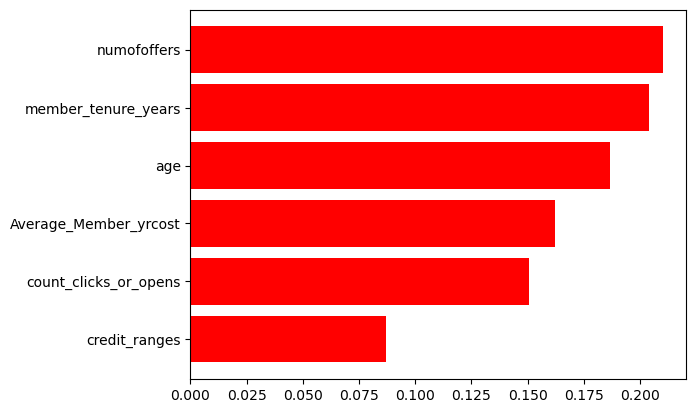

<Figure size 6000x4500 with 0 Axes>

In [103]:
# Generate feature importance plot
feat_imp = cv.best_estimator_.feature_importances_
indices = np.argsort(feat_imp)
plt.yticks(range(len(indices)), [train_features_num.columns[i] for i in indices])
plt.barh(range(len(indices)), feat_imp[indices], color='r', align='center')
plt.figure(figsize=(60, 45))
plt.show()

In [104]:
joblib.dump(cv.best_estimator_, 'rf_features_num.pkl')

['rf_features_num.pkl']

### Step #10: Build rf model for all features

In [105]:
train_features_all = pd.read_csv('train_features_all.csv')
train_labels = pd.read_csv('train_labels.csv')

train_features_all.head()

Average_Member_yrcost       age  count_clicks_or_opens  credit_ranges  \
0               2.070463 -0.140228               0.933098      -0.819378   
1              -0.451257 -1.272421               1.007066       1.237428   
2              -0.451257 -0.140228               0.156426      -0.819378   
3              -0.451257 -0.140228              -0.379847      -0.819378   
4              -0.451257  0.271478              -0.268894       1.237428   

   member_tenure_years  numofoffers  children_No  children_Unknown  \
0             0.255809    -0.954697    -0.493731          1.173376   
1            -0.267665    -0.954697    -0.493731         -0.852242   
2            -0.965629     0.156857    -0.493731          1.173376   
3            -0.267665    -0.954697    -0.493731          1.173376   
4             1.564492    -0.954697    -0.493731         -0.852242   

   children_Yes  dwelling_type_Multi Family Dwelling/Apartment  ...  \
0     -0.788333                                      -0.335266  ...   
1      1.268499                                      -0.335266  ...   
2     -0.788333                                      -0.335266  ...   
3     -0.788333                                      -0.335266  ...   
4      1.268499                                       2.982709  ...   

   occupation_group_Management  occupation_group_Office Administration  \
0                    -0.284569                               -0.271847   
1                    -0.284569                               -0.271847   
2                    -0.284569                               -0.271847   
3                    -0.284569                               -0.271847   
4                    -0.284569                               -0.271847   

   occupation_group_Other  occupation_group_Professional  \
0                0.974200                      -0.361987   
1               -1.026483                      -0.361987   
2                0.974200                      -0.361987   
3                0.974200                      -0.361987   
4                0.974200                      -0.361987   

   occupation_group_Retired  occupation_group_Sales  \
0                  -0.34641               -0.187528   
1                  -0.34641                5.332532   
2                  -0.34641               -0.187528   
3                  -0.34641               -0.187528   
4                  -0.34641               -0.187528   

   occupation_group_Technical  member_type_Associate  member_type_Primary  \
0                   -0.169334              -0.442531             0.651397   
1                   -0.169334              -0.442531            -1.535163   
2                   -0.169334              -0.442531             0.651397   
3                   -0.169334              -0.442531            -1.535163   
4                   -0.169334              -0.442531             0.651397   

   member_type_Unknown  
0            -0.393611  
1             2.540580  
2            -0.393611  
3             2.540580  
4            -0.393611  

[5 rows x 86 columns]

In [106]:
train_features_all['age'].fillna(train_features_all['age'].mean(), inplace=True)

In [107]:
train_features_all.isnull().sum()

Average_Member_yrcost         0
age                           0
count_clicks_or_opens         0
credit_ranges                 0
member_tenure_years           0
                             ..
occupation_group_Sales        0
occupation_group_Technical    0
member_type_Associate         0
member_type_Primary           0
member_type_Unknown           0
Length: 86, dtype: int64

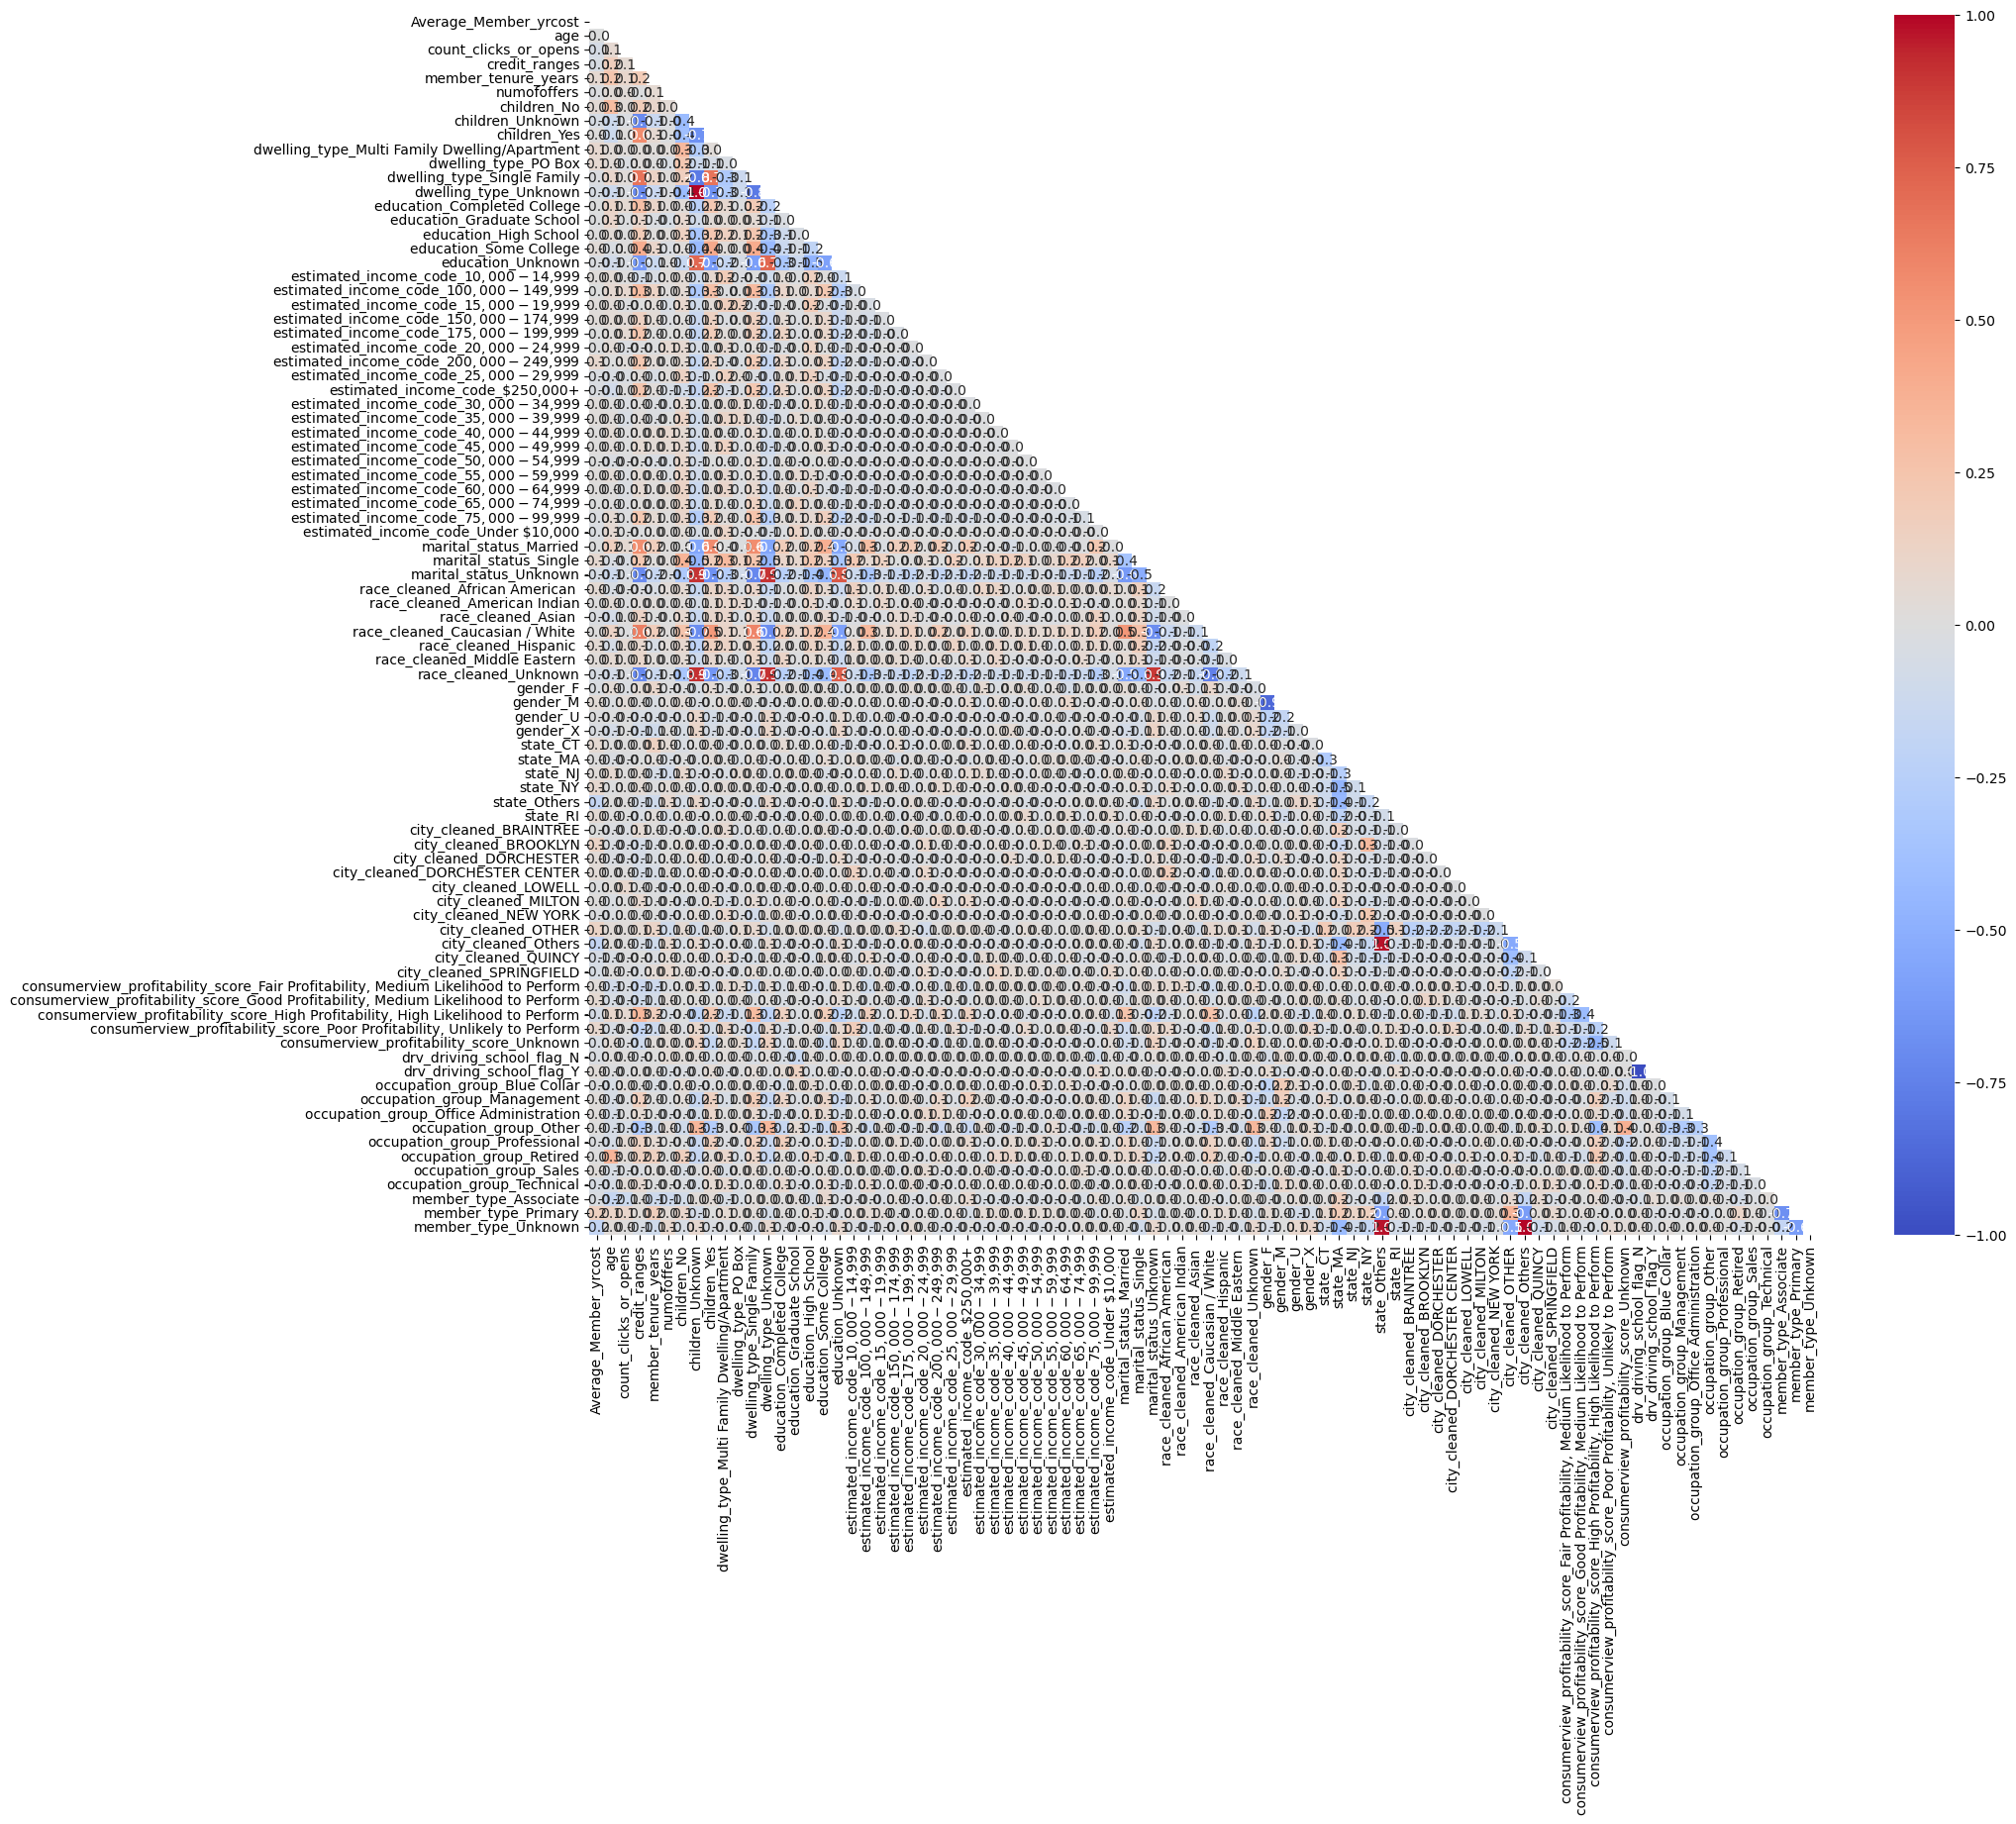

In [108]:
matrix = np.triu(train_features_all.corr())
plt.figure(figsize=(20, 16))
sns.heatmap(train_features_all.corr(), annot=True, fmt='.1f', vmin=-1, vmax=1, center= 0, cmap='coolwarm', mask=matrix)
plt.show()

In [109]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [110]:
# Conduct search for best params while running cross-validation (GridSearchCV)
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [2**i for i in range(3, 10)],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(train_features_all, train_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 8, 'n_estimators': 16}

0.75 (+/-0.004) for {'max_depth': 2, 'n_estimators': 8}
0.75 (+/-0.004) for {'max_depth': 2, 'n_estimators': 16}
0.75 (+/-0.004) for {'max_depth': 2, 'n_estimators': 32}
0.75 (+/-0.004) for {'max_depth': 2, 'n_estimators': 64}
0.75 (+/-0.004) for {'max_depth': 2, 'n_estimators': 128}
0.75 (+/-0.004) for {'max_depth': 2, 'n_estimators': 256}
0.75 (+/-0.004) for {'max_depth': 2, 'n_estimators': 512}
0.75 (+/-0.004) for {'max_depth': 4, 'n_estimators': 8}
0.751 (+/-0.006) for {'max_depth': 4, 'n_estimators': 16}
0.75 (+/-0.004) for {'max_depth': 4, 'n_estimators': 32}
0.75 (+/-0.004) for {'max_depth': 4, 'n_estimators': 64}
0.75 (+/-0.004) for {'max_depth': 4, 'n_estimators': 128}
0.75 (+/-0.004) for {'max_depth': 4, 'n_estimators': 256}
0.75 (+/-0.004) for {'max_depth': 4, 'n_estimators': 512}
0.742 (+/-0.02) for {'max_depth': 8, 'n_estimators': 8}
0.755 (+/-0.016) for {'max_depth': 8, 'n_estimators': 16}
0.747 (+/-0.01) for {'max_depth'

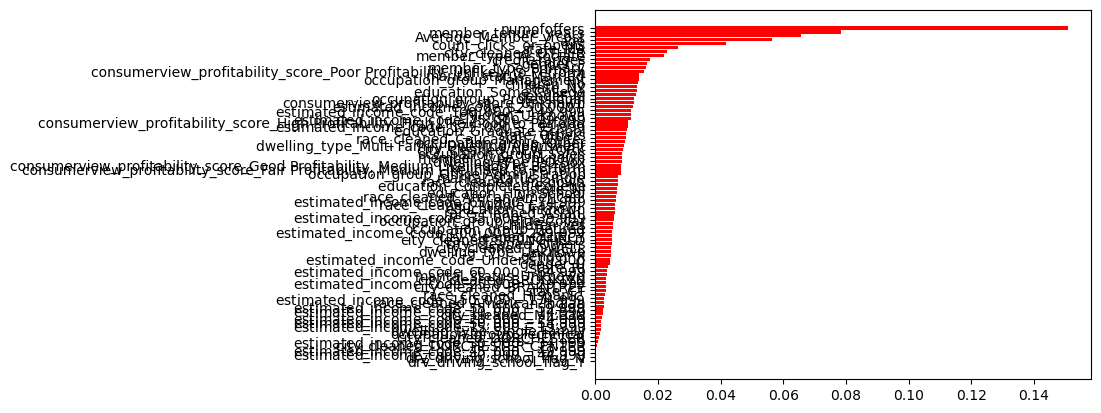

<Figure size 6000x4500 with 0 Axes>

In [111]:
# Generate feature importance plot
feat_imp = cv.best_estimator_.feature_importances_
indices = np.argsort(feat_imp)
plt.yticks(range(len(indices)), [train_features_all.columns[i] for i in indices])
plt.barh(range(len(indices)), feat_imp[indices], color='r', align='center')
plt.figure(figsize=(60, 45))
plt.show()

In [112]:
joblib.dump(cv.best_estimator_, 'rf_features_all.pkl')

['rf_features_all.pkl']

### Step #11: Evaluate with Validation Set

In [113]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time
%matplotlib inline

In [114]:
val_features_cat = pd.read_csv('val_features_cat.csv')
val_features_num = pd.read_csv('val_features_num.csv')
val_features_all = pd.read_csv('val_features_all.csv')
val_features_red = pd.read_csv('val_features_reduced.csv')

val_labels = pd.read_csv('val_labels.csv')

val_features_red.head()

Average_Member_yrcost       age  count_clicks_or_opens  credit_ranges  \
0               1.097030 -0.090995              -0.379847      -0.819378   
1              -0.451257  2.330009              -0.379847      -0.819378   
2              -0.451257 -2.713393              -0.379847      -0.819378   
3              -0.451257  2.844642              -0.379847       1.237428   
4               0.402632 -2.404613              -0.379847       1.237428   

   member_tenure_years  numofoffers  children_No  children_Unknown  \
0            -0.703892     0.156857     2.025394         -0.852242   
1            -0.180419     0.156857     2.025394         -0.852242   
2            -0.267665    -0.954697    -0.493731         -0.852242   
3             1.302756     1.268411    -0.493731         -0.852242   
4             0.517546    -0.954697    -0.493731         -0.852242   

   children_Yes  dwelling_type_Multi Family Dwelling/Apartment  ...  \
0     -0.788333                                      -0.335266  ...   
1     -0.788333                                      -0.335266  ...   
2      1.268499                                      -0.335266  ...   
3      1.268499                                      -0.335266  ...   
4      1.268499                                      -0.335266  ...   

   occupation_group_Blue Collar  occupation_group_Management  \
0                     -0.248957                    -0.284569   
1                     -0.248957                    -0.284569   
2                     -0.248957                    -0.284569   
3                     -0.248957                    -0.284569   
4                     -0.248957                     3.514091   

   occupation_group_Office Administration  occupation_group_Other  \
0                               -0.271847                0.974200   
1                               -0.271847                0.974200   
2                               -0.271847               -1.026483   
3                               -0.271847               -1.026483   
4                               -0.271847               -1.026483   

   occupation_group_Professional  occupation_group_Retired  \
0                      -0.361987                 -0.346410   
1                      -0.361987                 -0.346410   
2                      -0.361987                  2.886751   
3                      -0.361987                  2.886751   
4                      -0.361987                 -0.346410   

   occupation_group_Sales  occupation_group_Technical  member_type_Associate  \
0               -0.187528                   -0.169334              -0.442531   
1               -0.187528                   -0.169334              -0.442531   
2               -0.187528                   -0.169334              -0.442531   
3               -0.187528                   -0.169334              -0.442531   
4               -0.187528                   -0.169334               2.259731   

   member_type_Primary  
0             0.651397  
1             0.651397  
2            -1.535163  
3             0.651397  
4            -1.535163  

[5 rows x 45 columns]

In [115]:
val_features_num.isnull().sum()

Average_Member_yrcost    0
age                      0
count_clicks_or_opens    0
credit_ranges            0
member_tenure_years      0
numofoffers              0
dtype: int64

In [116]:
# Read in models
models = {}

for mdl in ['cat', 'num', 'all', 'red']:
    models[mdl] = joblib.load('rf_features_{}.pkl'.format(mdl))

In [117]:
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred), 3)
    recall = round(recall_score(labels, pred), 3)
    print('{} -- \tAccuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                     accuracy,
                                                                                     precision,
                                                                                     recall,
                                                                                     round((end - start)*1000, 1)))

In [118]:
# Evaluate all of our models on the validation set
evaluate_model('Categorical Features', models['cat'], val_features_cat, val_labels)
evaluate_model('Numerical Features', models['num'], val_features_num, val_labels)
evaluate_model('All Features', models['all'], val_features_all, val_labels)
evaluate_model('Reduced Features', models['red'], val_features_red, val_labels)

Categorical Features -- 	Accuracy: 0.768 / Precision: 0.0 / Recall: 0.0 / Latency: 4.5ms
Numerical Features -- 	Accuracy: 0.756 / Precision: 0.412 / Recall: 0.123 / Latency: 9.1ms
All Features -- 	Accuracy: 0.78 / Precision: 0.636 / Recall: 0.123 / Latency: 4.1ms
Reduced Features -- 	Accuracy: 0.772 / Precision: 0.6 / Recall: 0.053 / Latency: 7.1ms


C:\Users\student\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Step #12: Evaluate Best Model on Test Set

In [119]:
# Read in our test features
test_features = pd.read_csv('test_features_cat.csv')
test_labels = pd.read_csv('test_labels.csv')

In [127]:
# Evaluate our final model on the test set
evaluate_model('Categorical Features', models['cat'], test_features, test_labels)

C:\Users\student\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Average_Member_yrcost
- age
- count_clicks_or_opens
- credit_ranges
- member_tenure_years
- ...
Feature names seen at fit time, yet now missing:
- city_cleaned_BRAINTREE
- city_cleaned_BROOKLYN
- city_cleaned_DORCHESTER
- city_cleaned_DORCHESTER CENTER
- city_cleaned_LOWELL
- ...

  warnings.warn(message, FutureWarning)


ValueError: X has 45 features, but RandomForestClassifier is expecting 80 features as input.

In [121]:
# Read in our test features
test_features = pd.read_csv('test_features_num.csv')
test_labels = pd.read_csv('test_labels.csv')

In [122]:
evaluate_model('Numerical Features', models['num'], test_features, test_labels)

Numerical Features -- 	Accuracy: 0.814 / Precision: 0.5 / Recall: 0.13 / Latency: 11.0ms


In [123]:
test_features = pd.read_csv('test_features_all.csv')
test_labels = pd.read_csv('test_labels.csv')

In [124]:
evaluate_model('All Features', models['all'], test_features, test_labels)

All Features -- 	Accuracy: 0.822 / Precision: 0.667 / Recall: 0.087 / Latency: 7.6ms


In [125]:
test_features = pd.read_csv('test_features_reduced.csv')
test_labels = pd.read_csv('test_labels.csv')

In [126]:
evaluate_model('Reduced Features', models['red'], test_features, test_labels)

Reduced Features -- 	Accuracy: 0.81 / Precision: 0.4 / Recall: 0.043 / Latency: 13.0ms
